This notebook contains code related to current model 2
- early feedback

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
from matplotlib.gridspec import GridSpec
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

import sys, os
import warnings
from pathlib import Path

In [2]:
sys.path.append(str(Path().resolve().parent.parent))
from path_manager import MISC_DIR, FORECAST_DATA_NB, PLOT_DIR

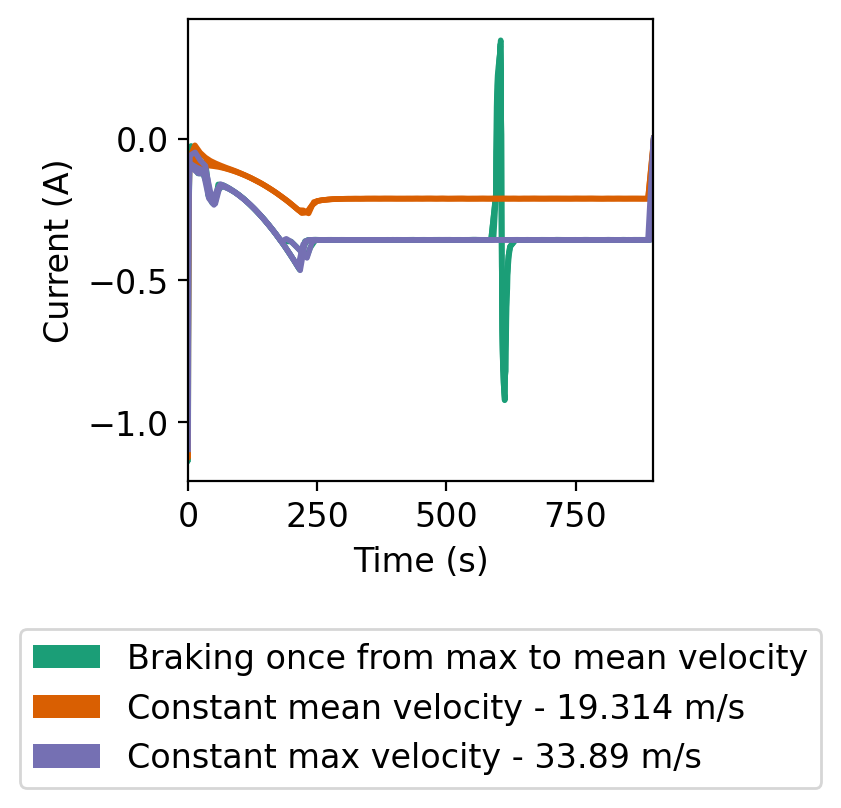

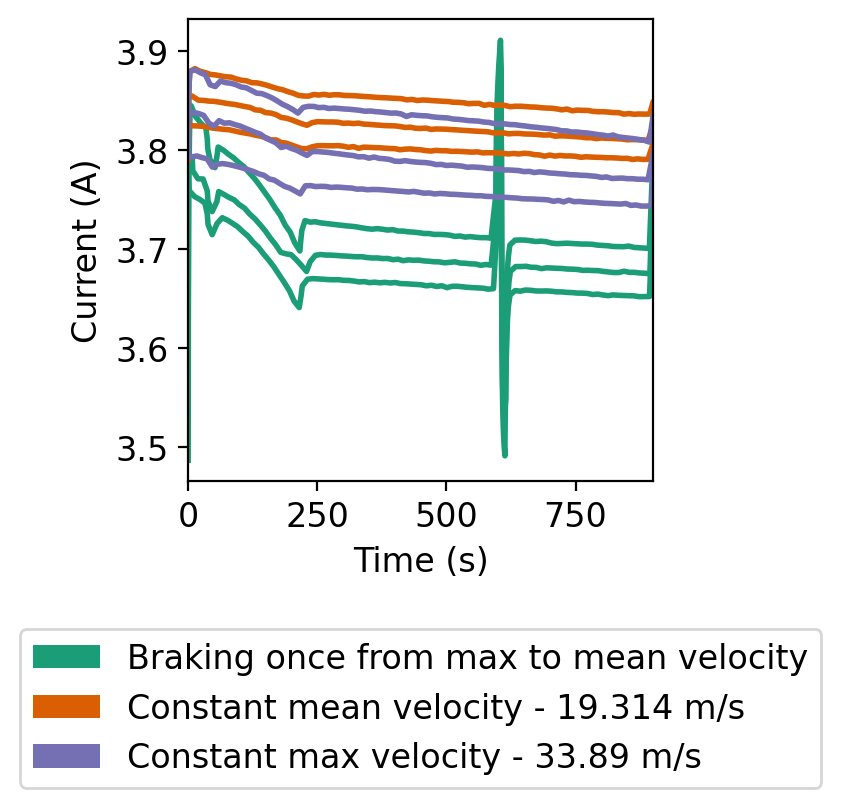

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

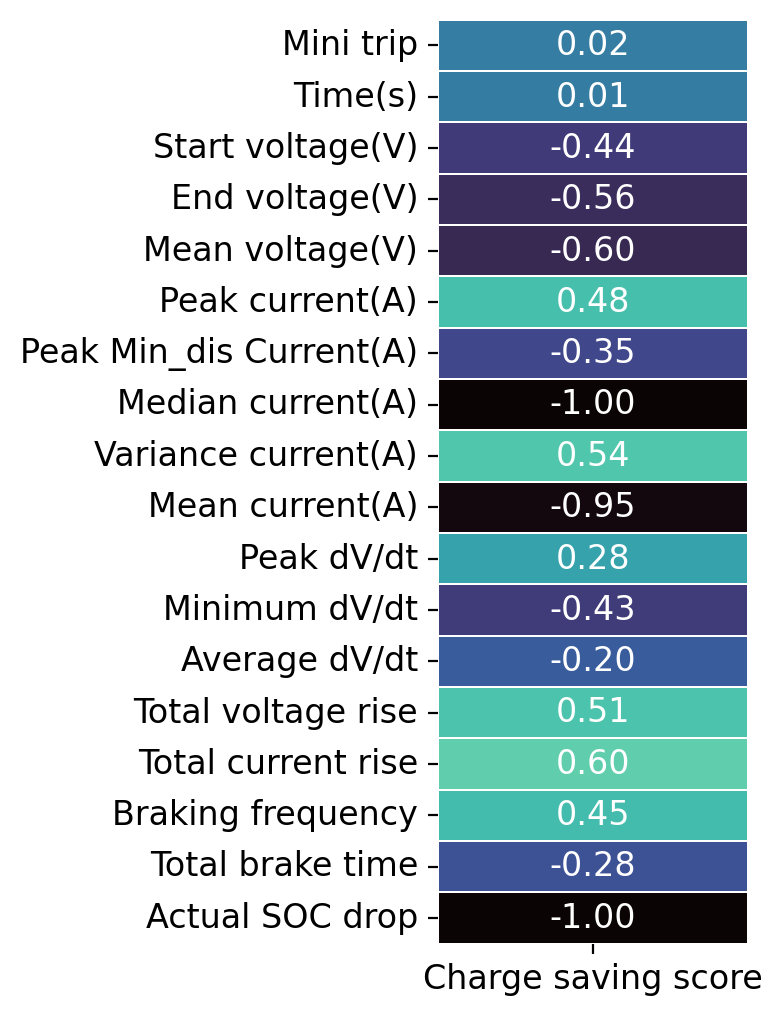

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

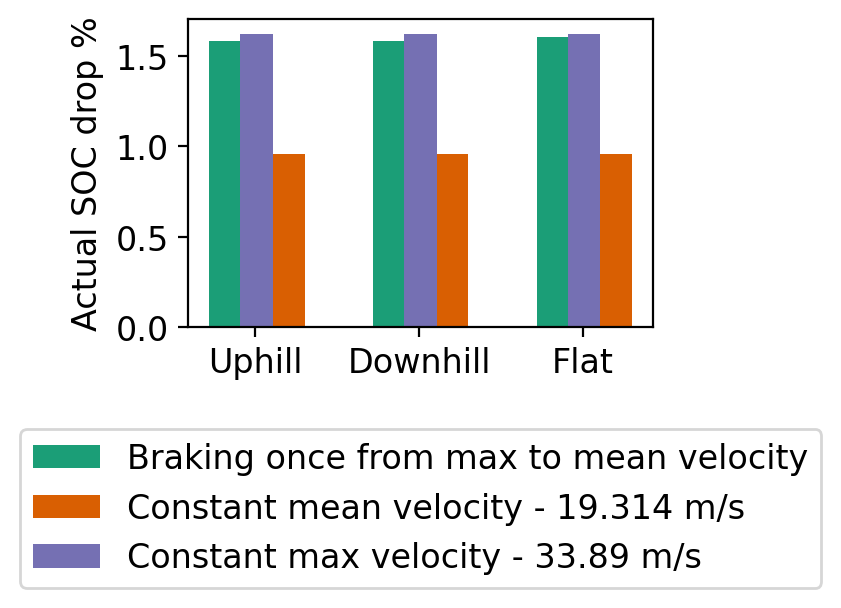

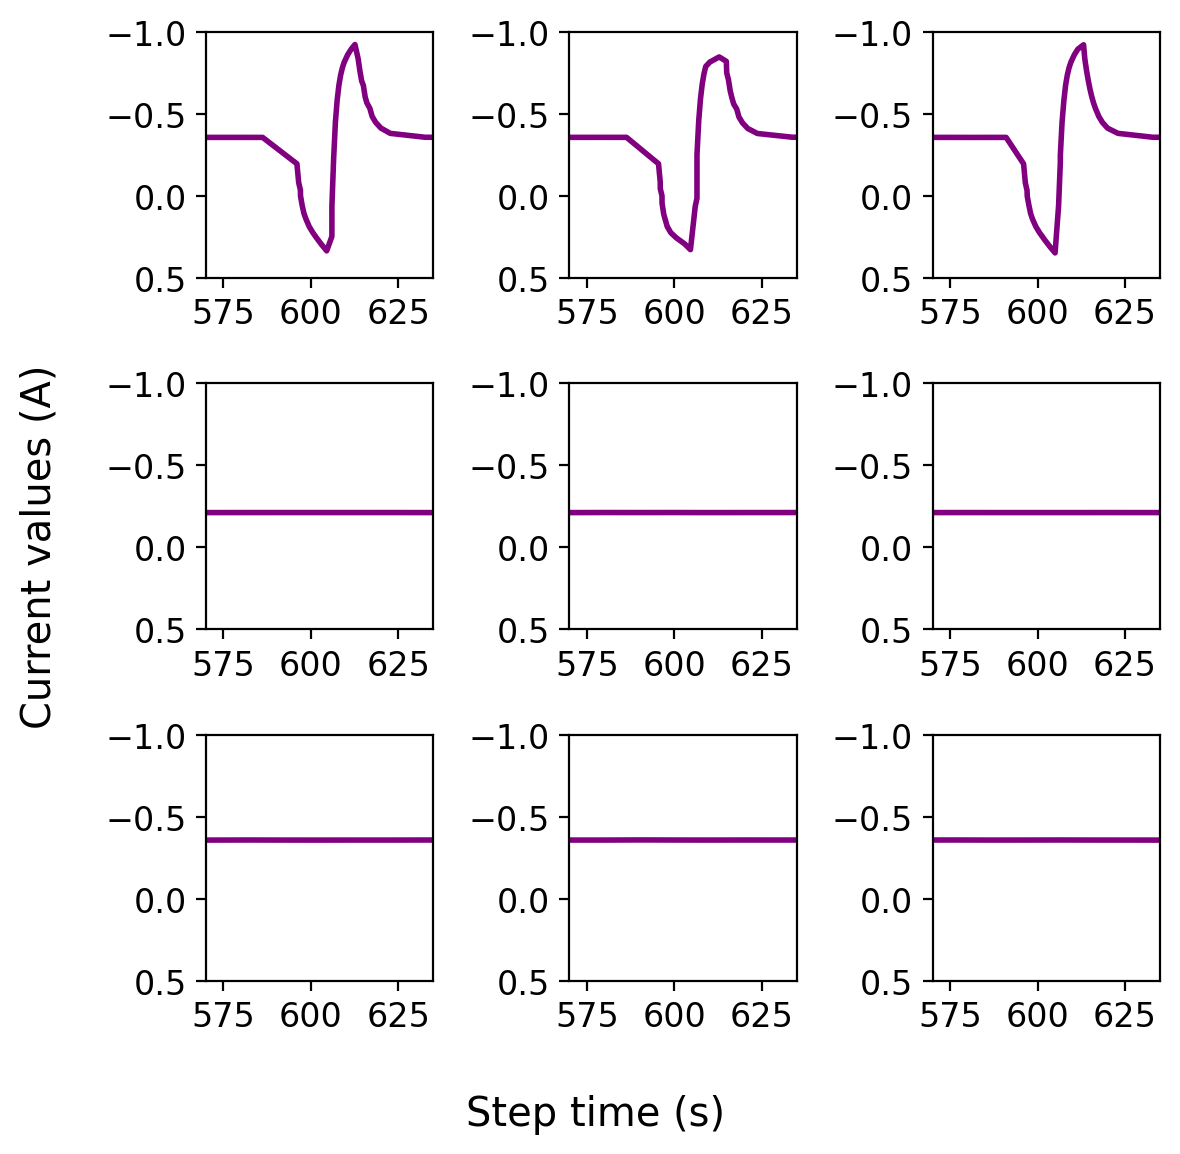

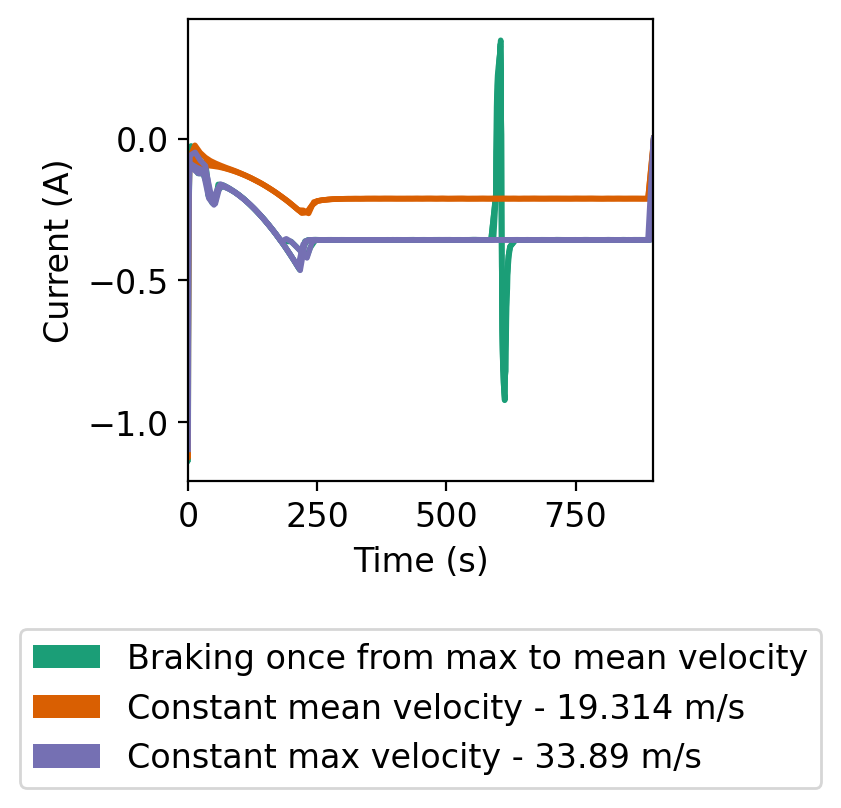

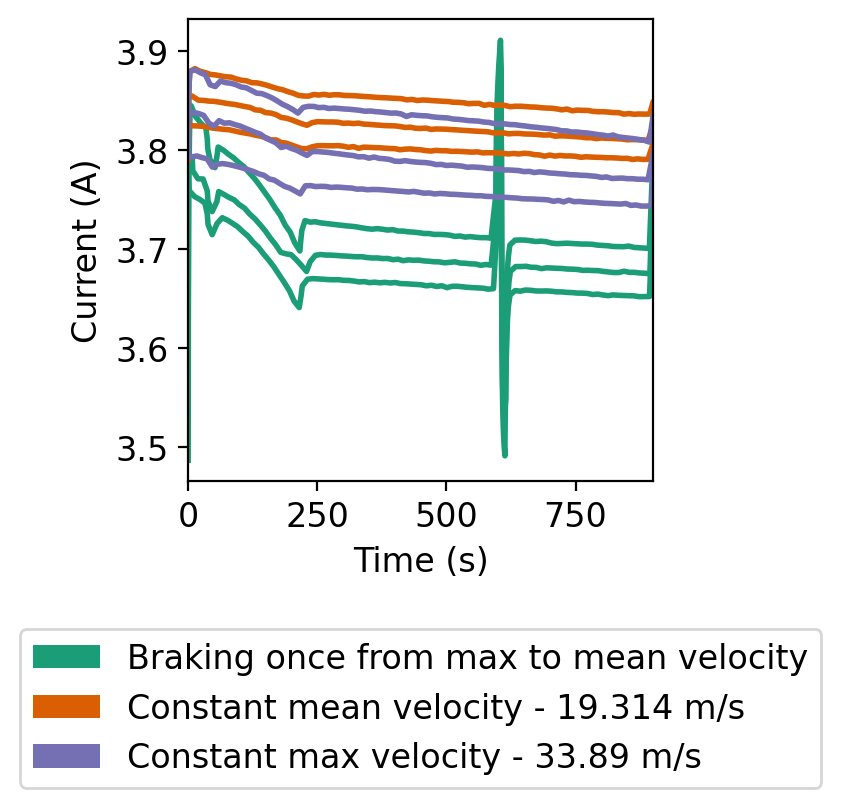

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

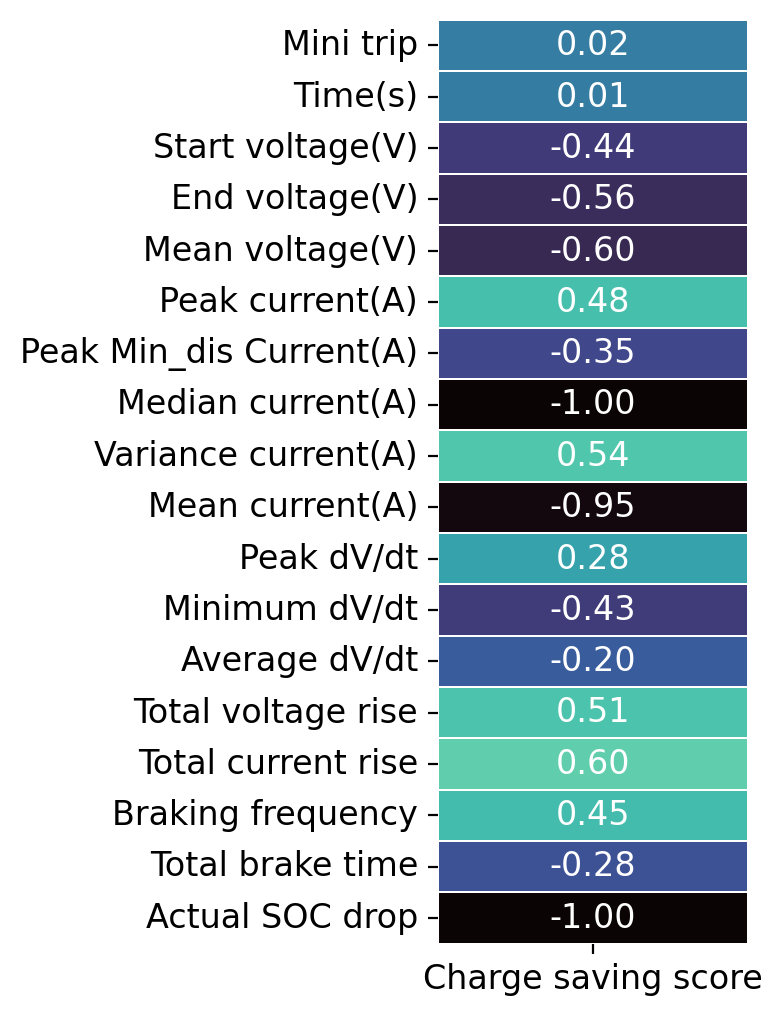

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

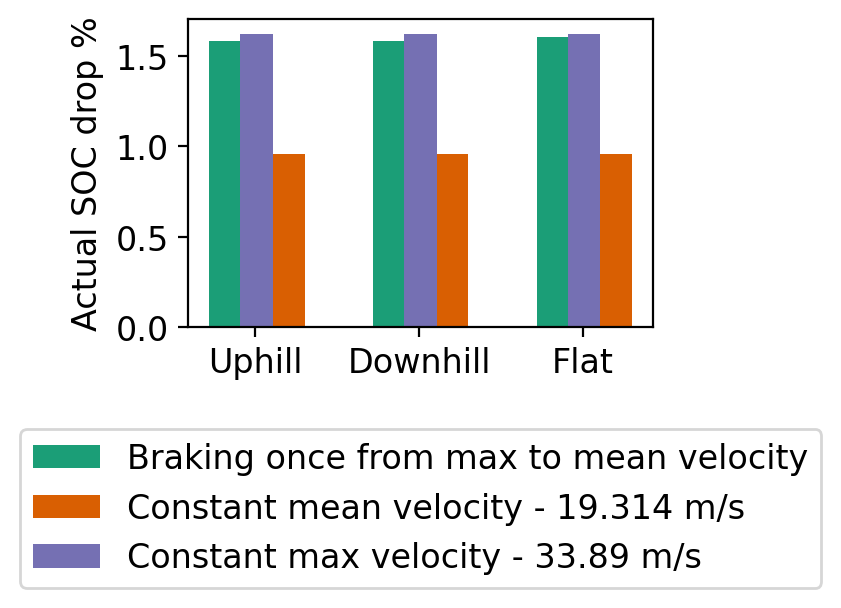

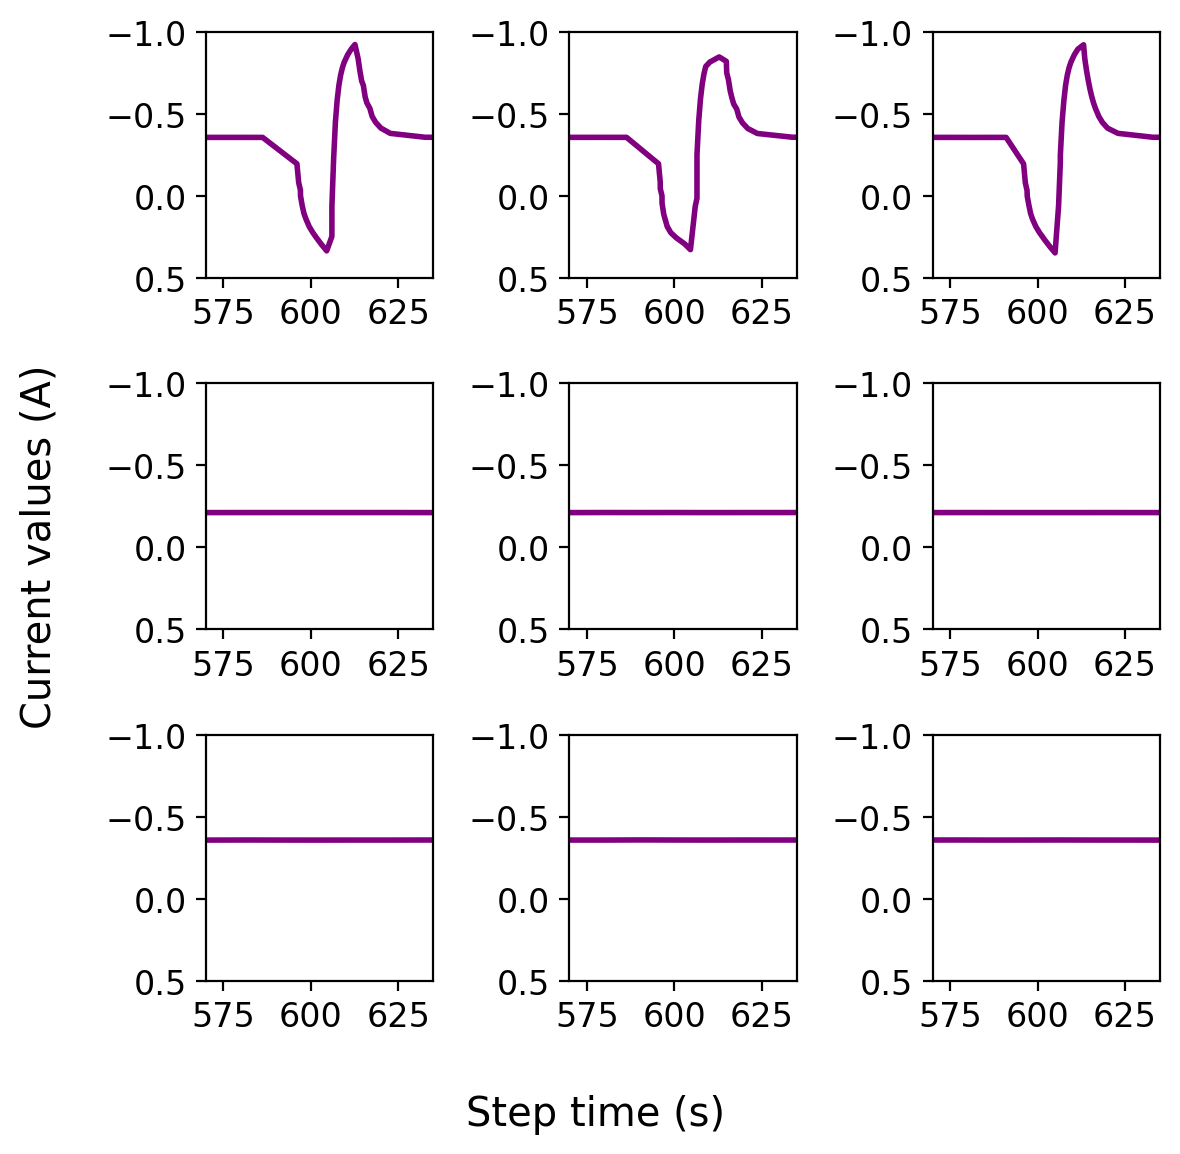

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/3217211

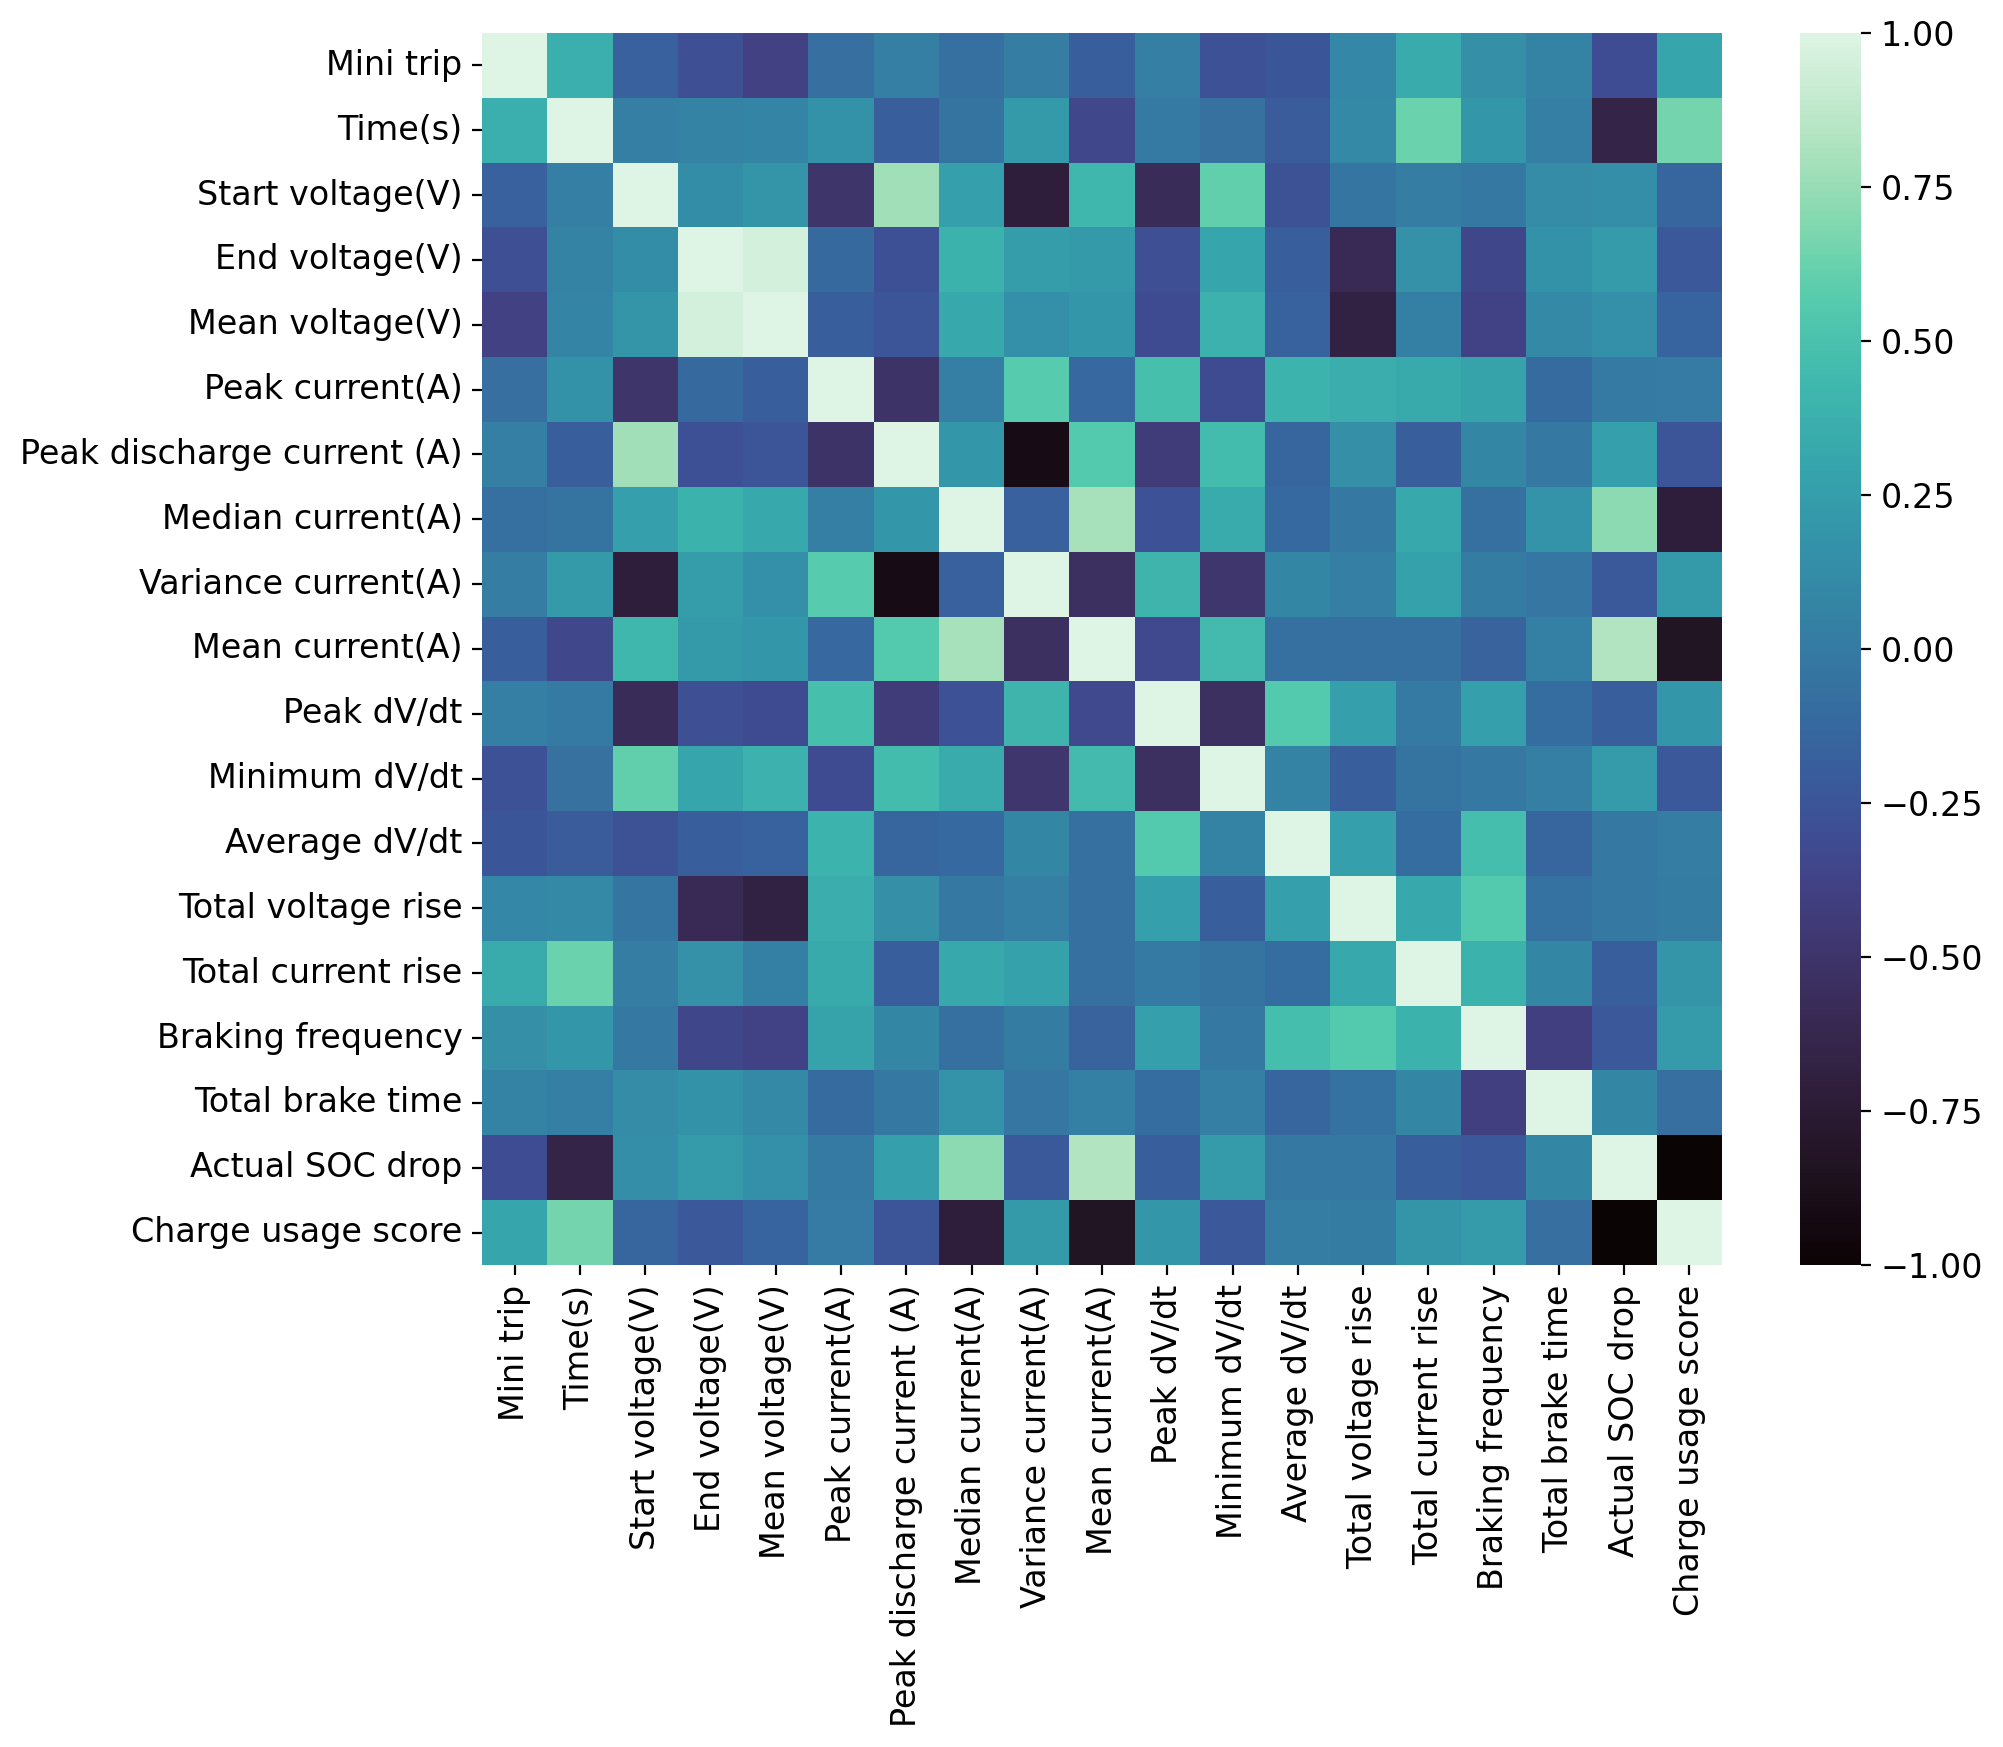

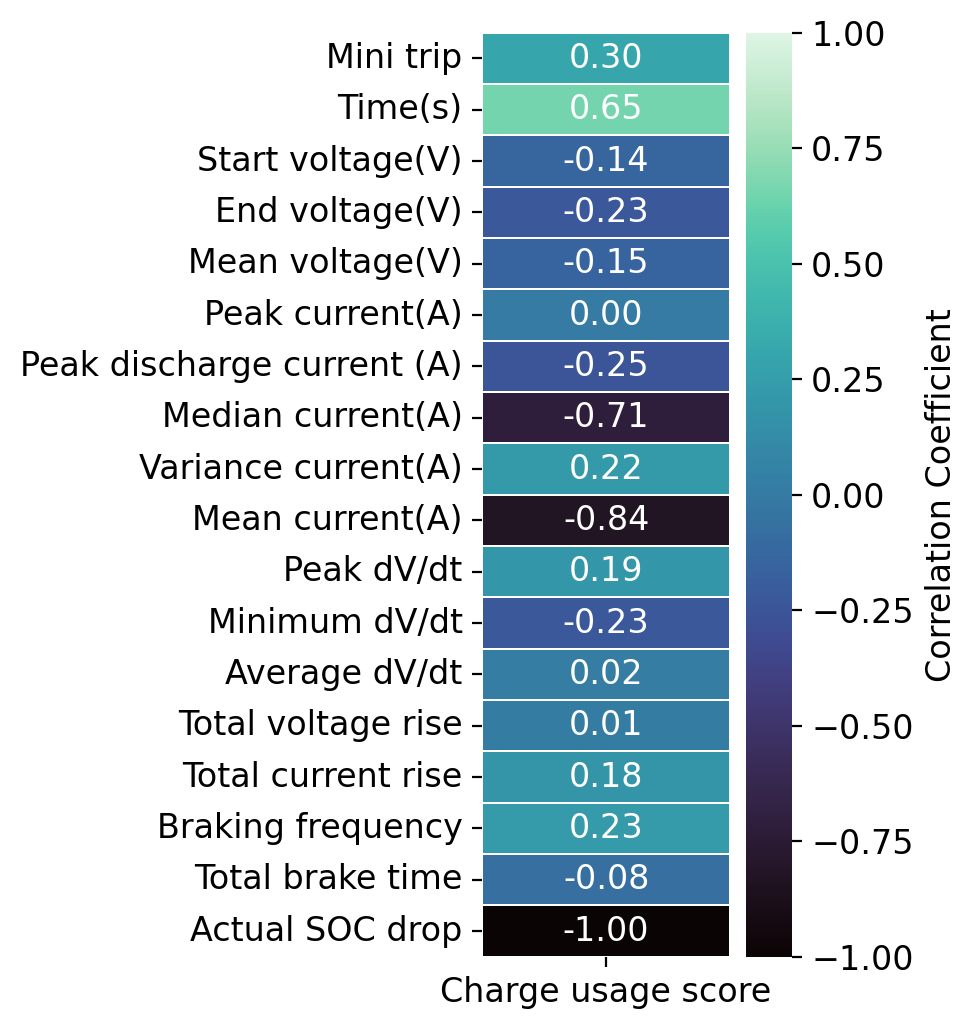

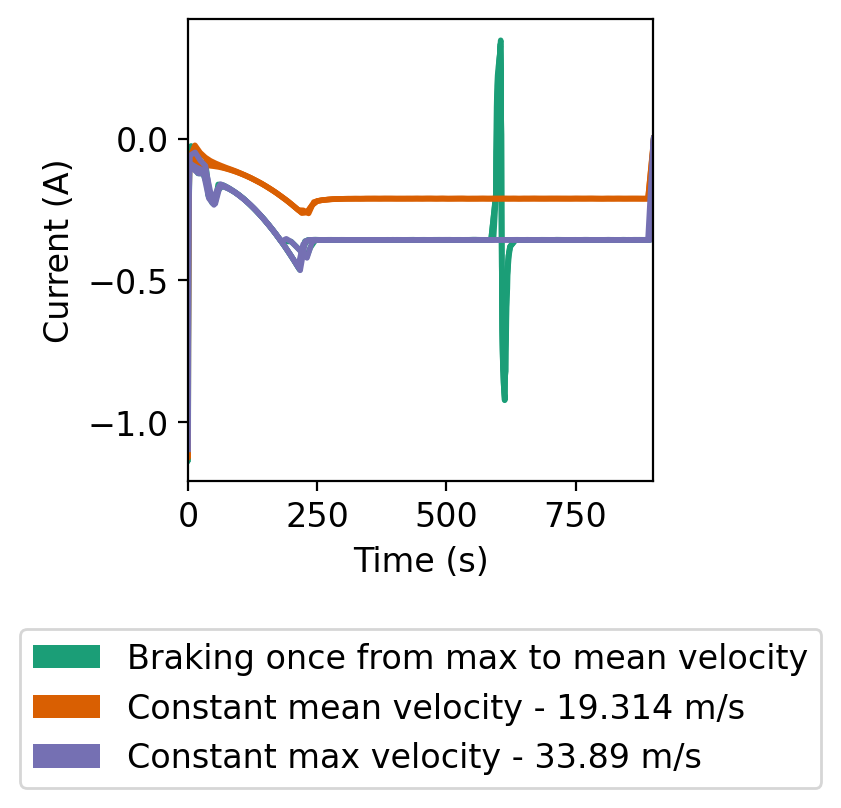

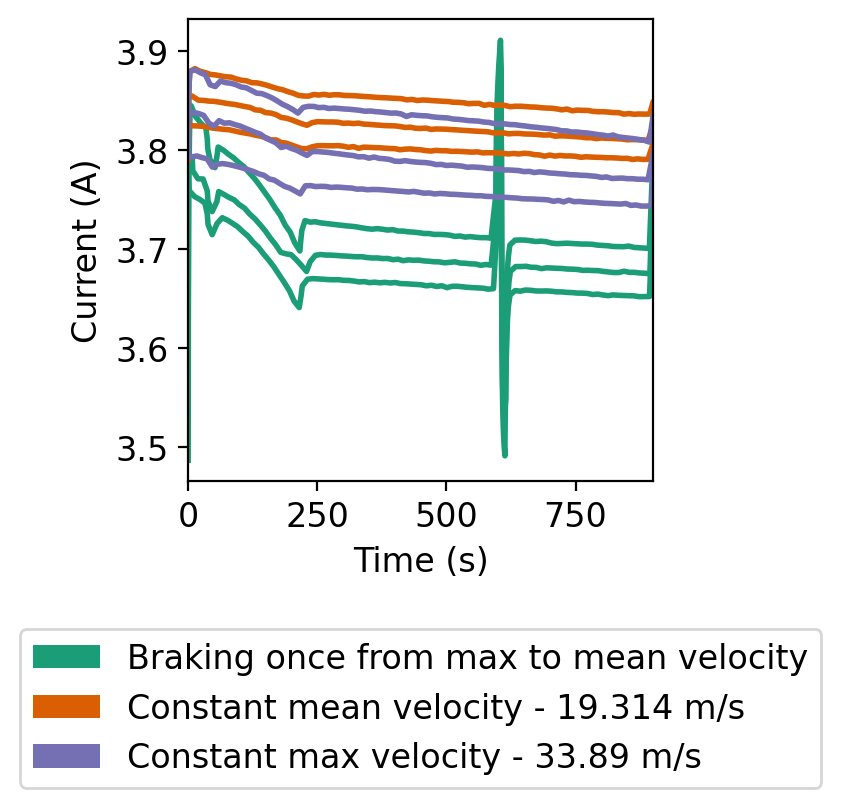

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

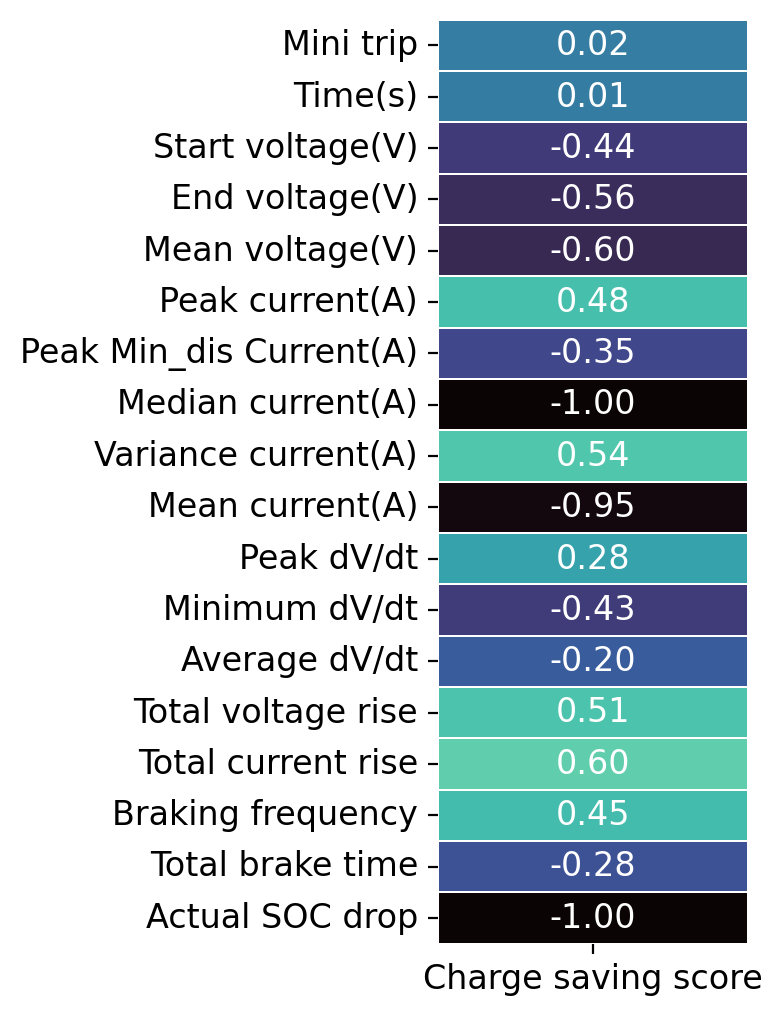

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

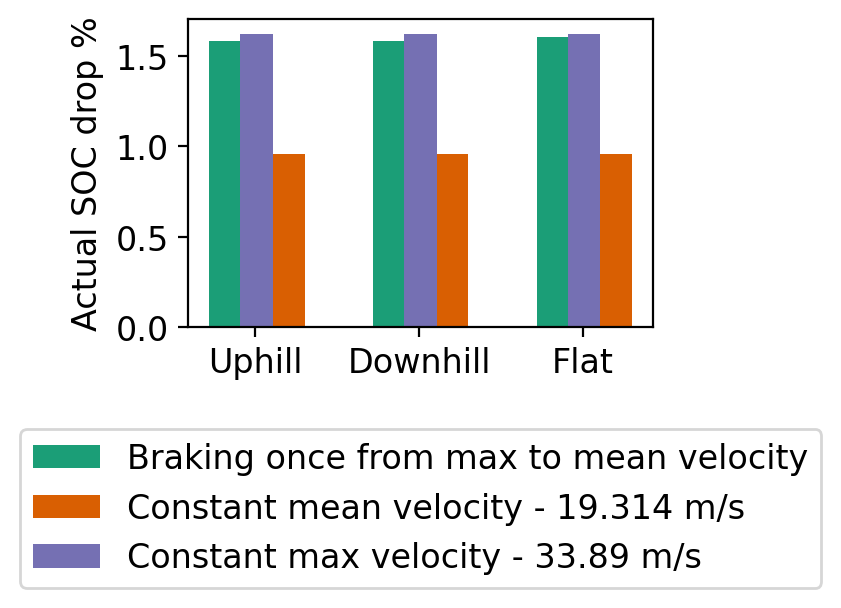

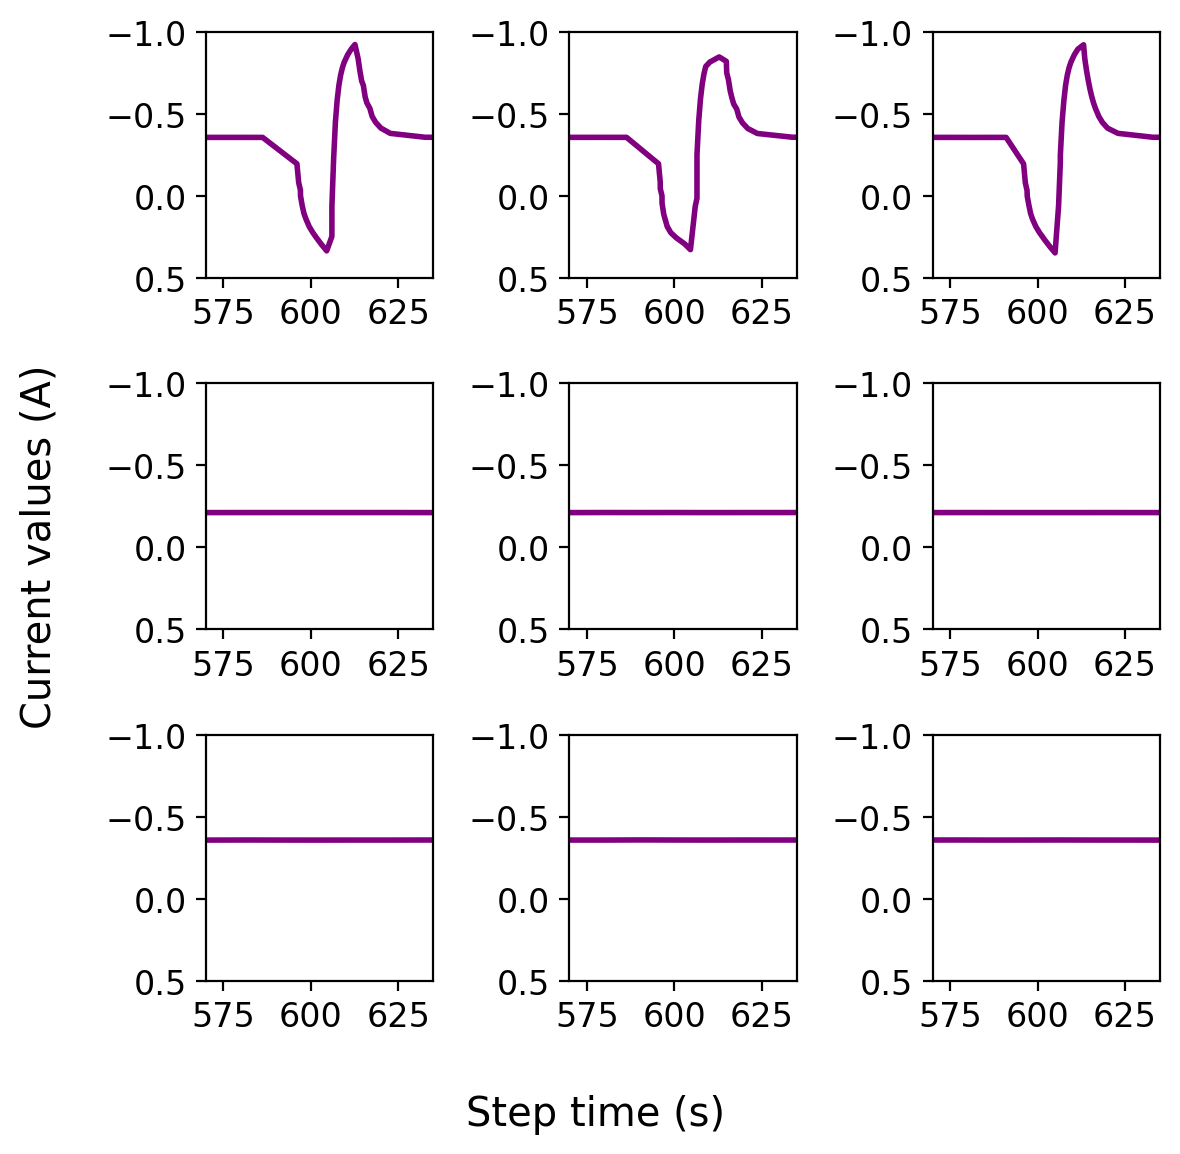

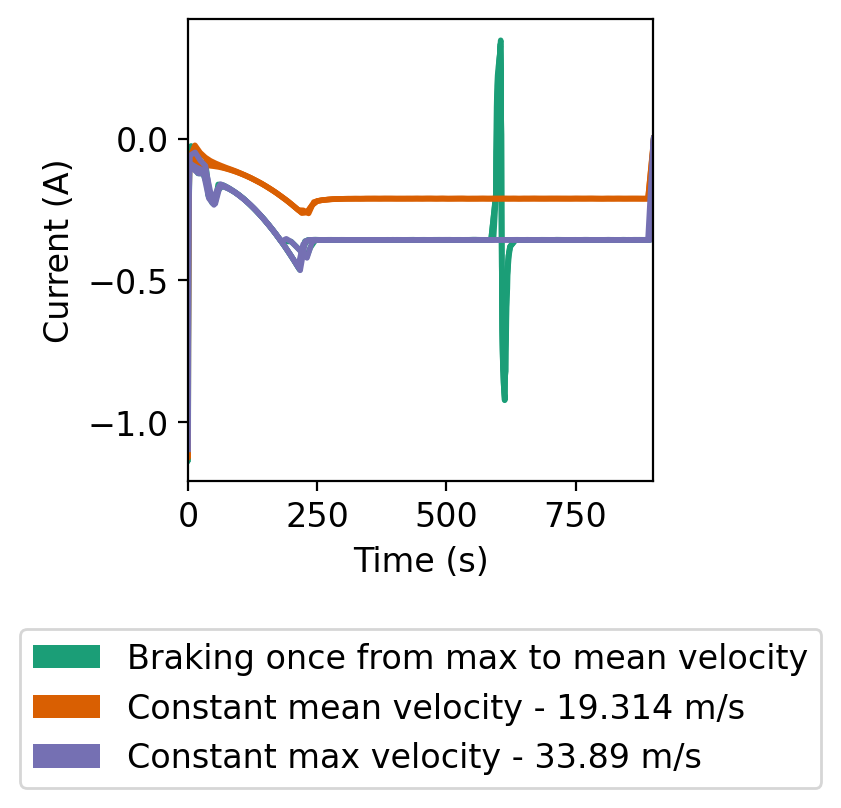

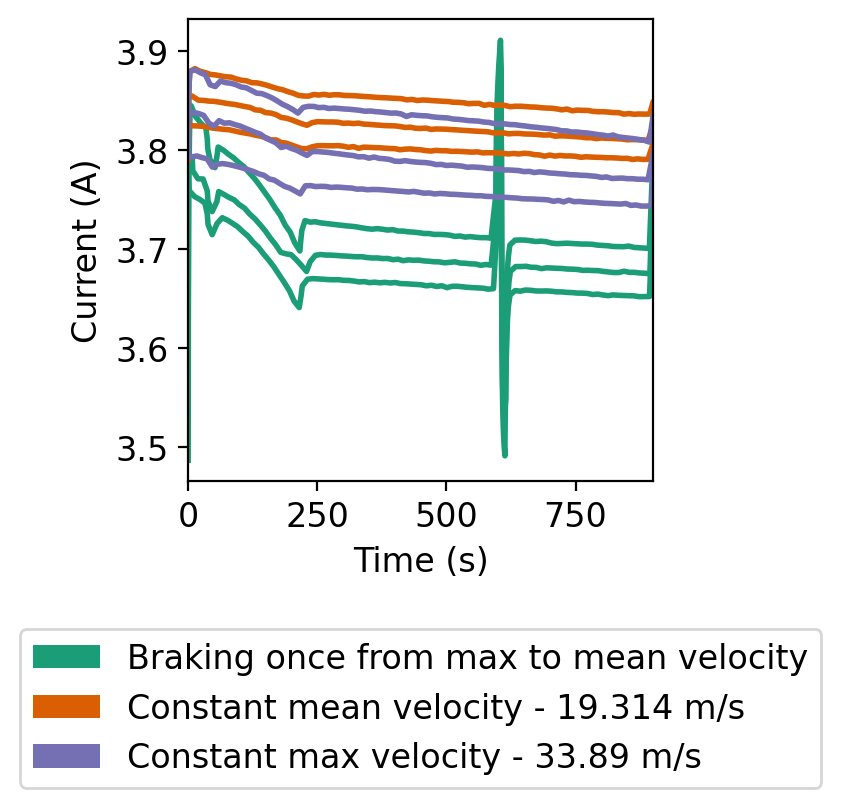

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

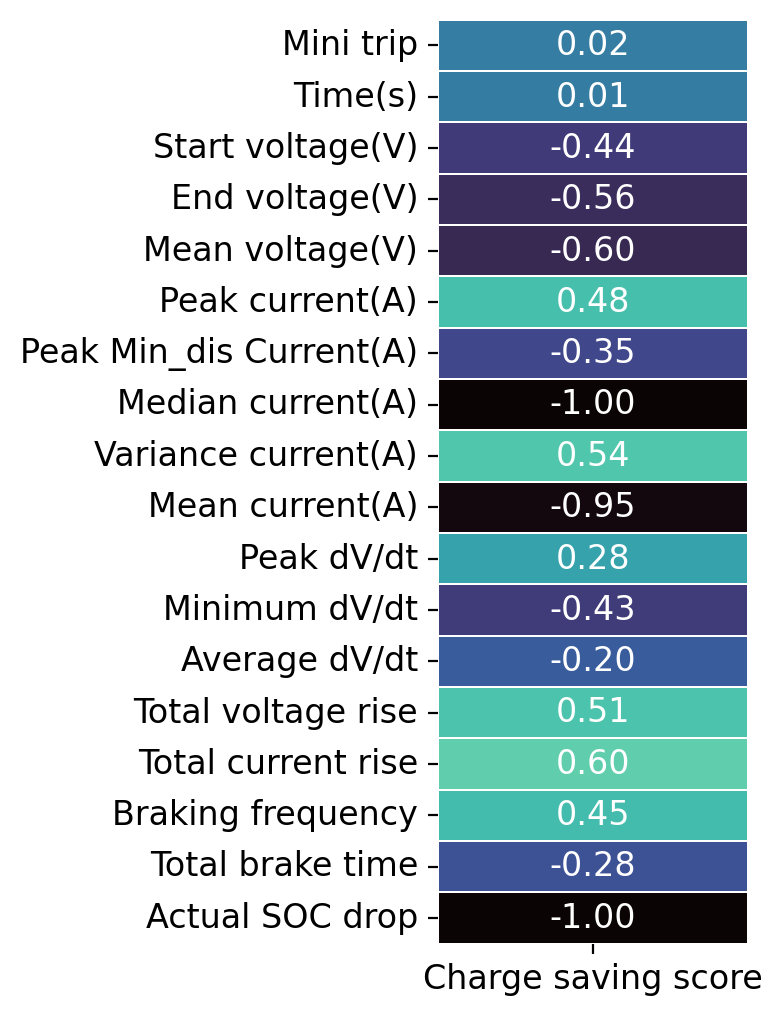

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

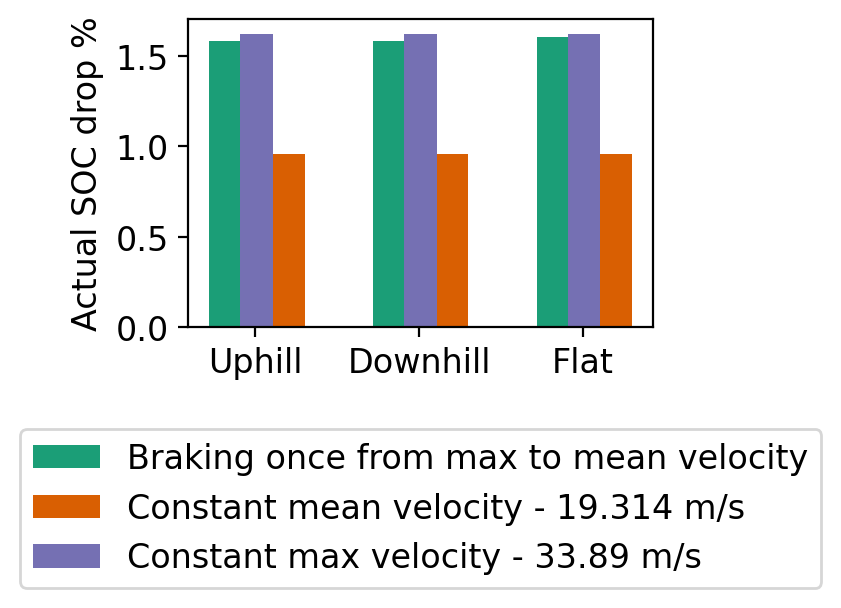

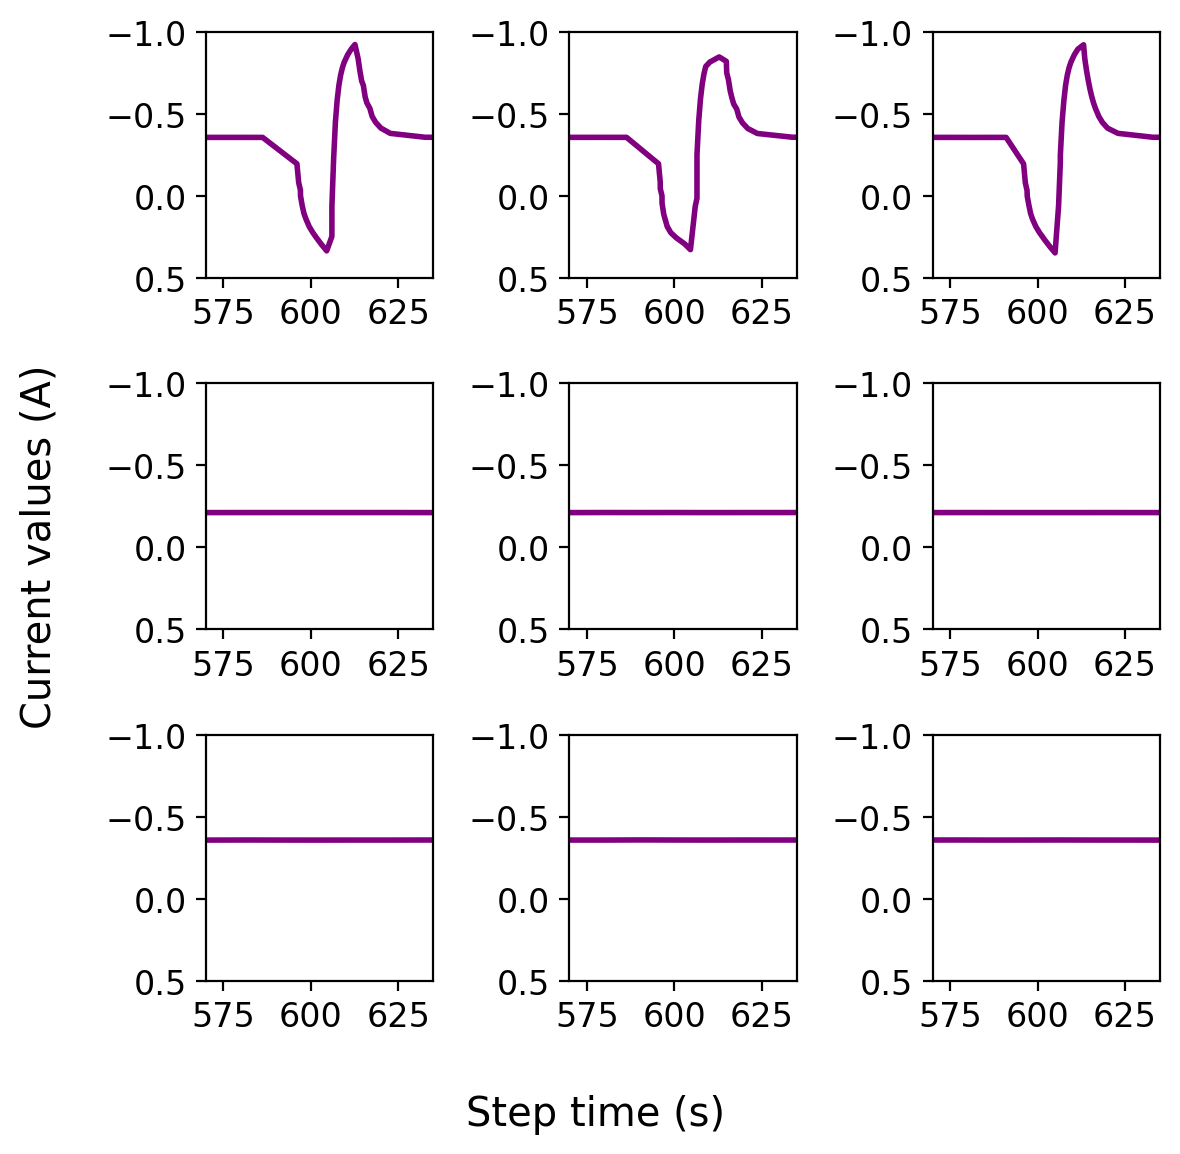

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/3217211

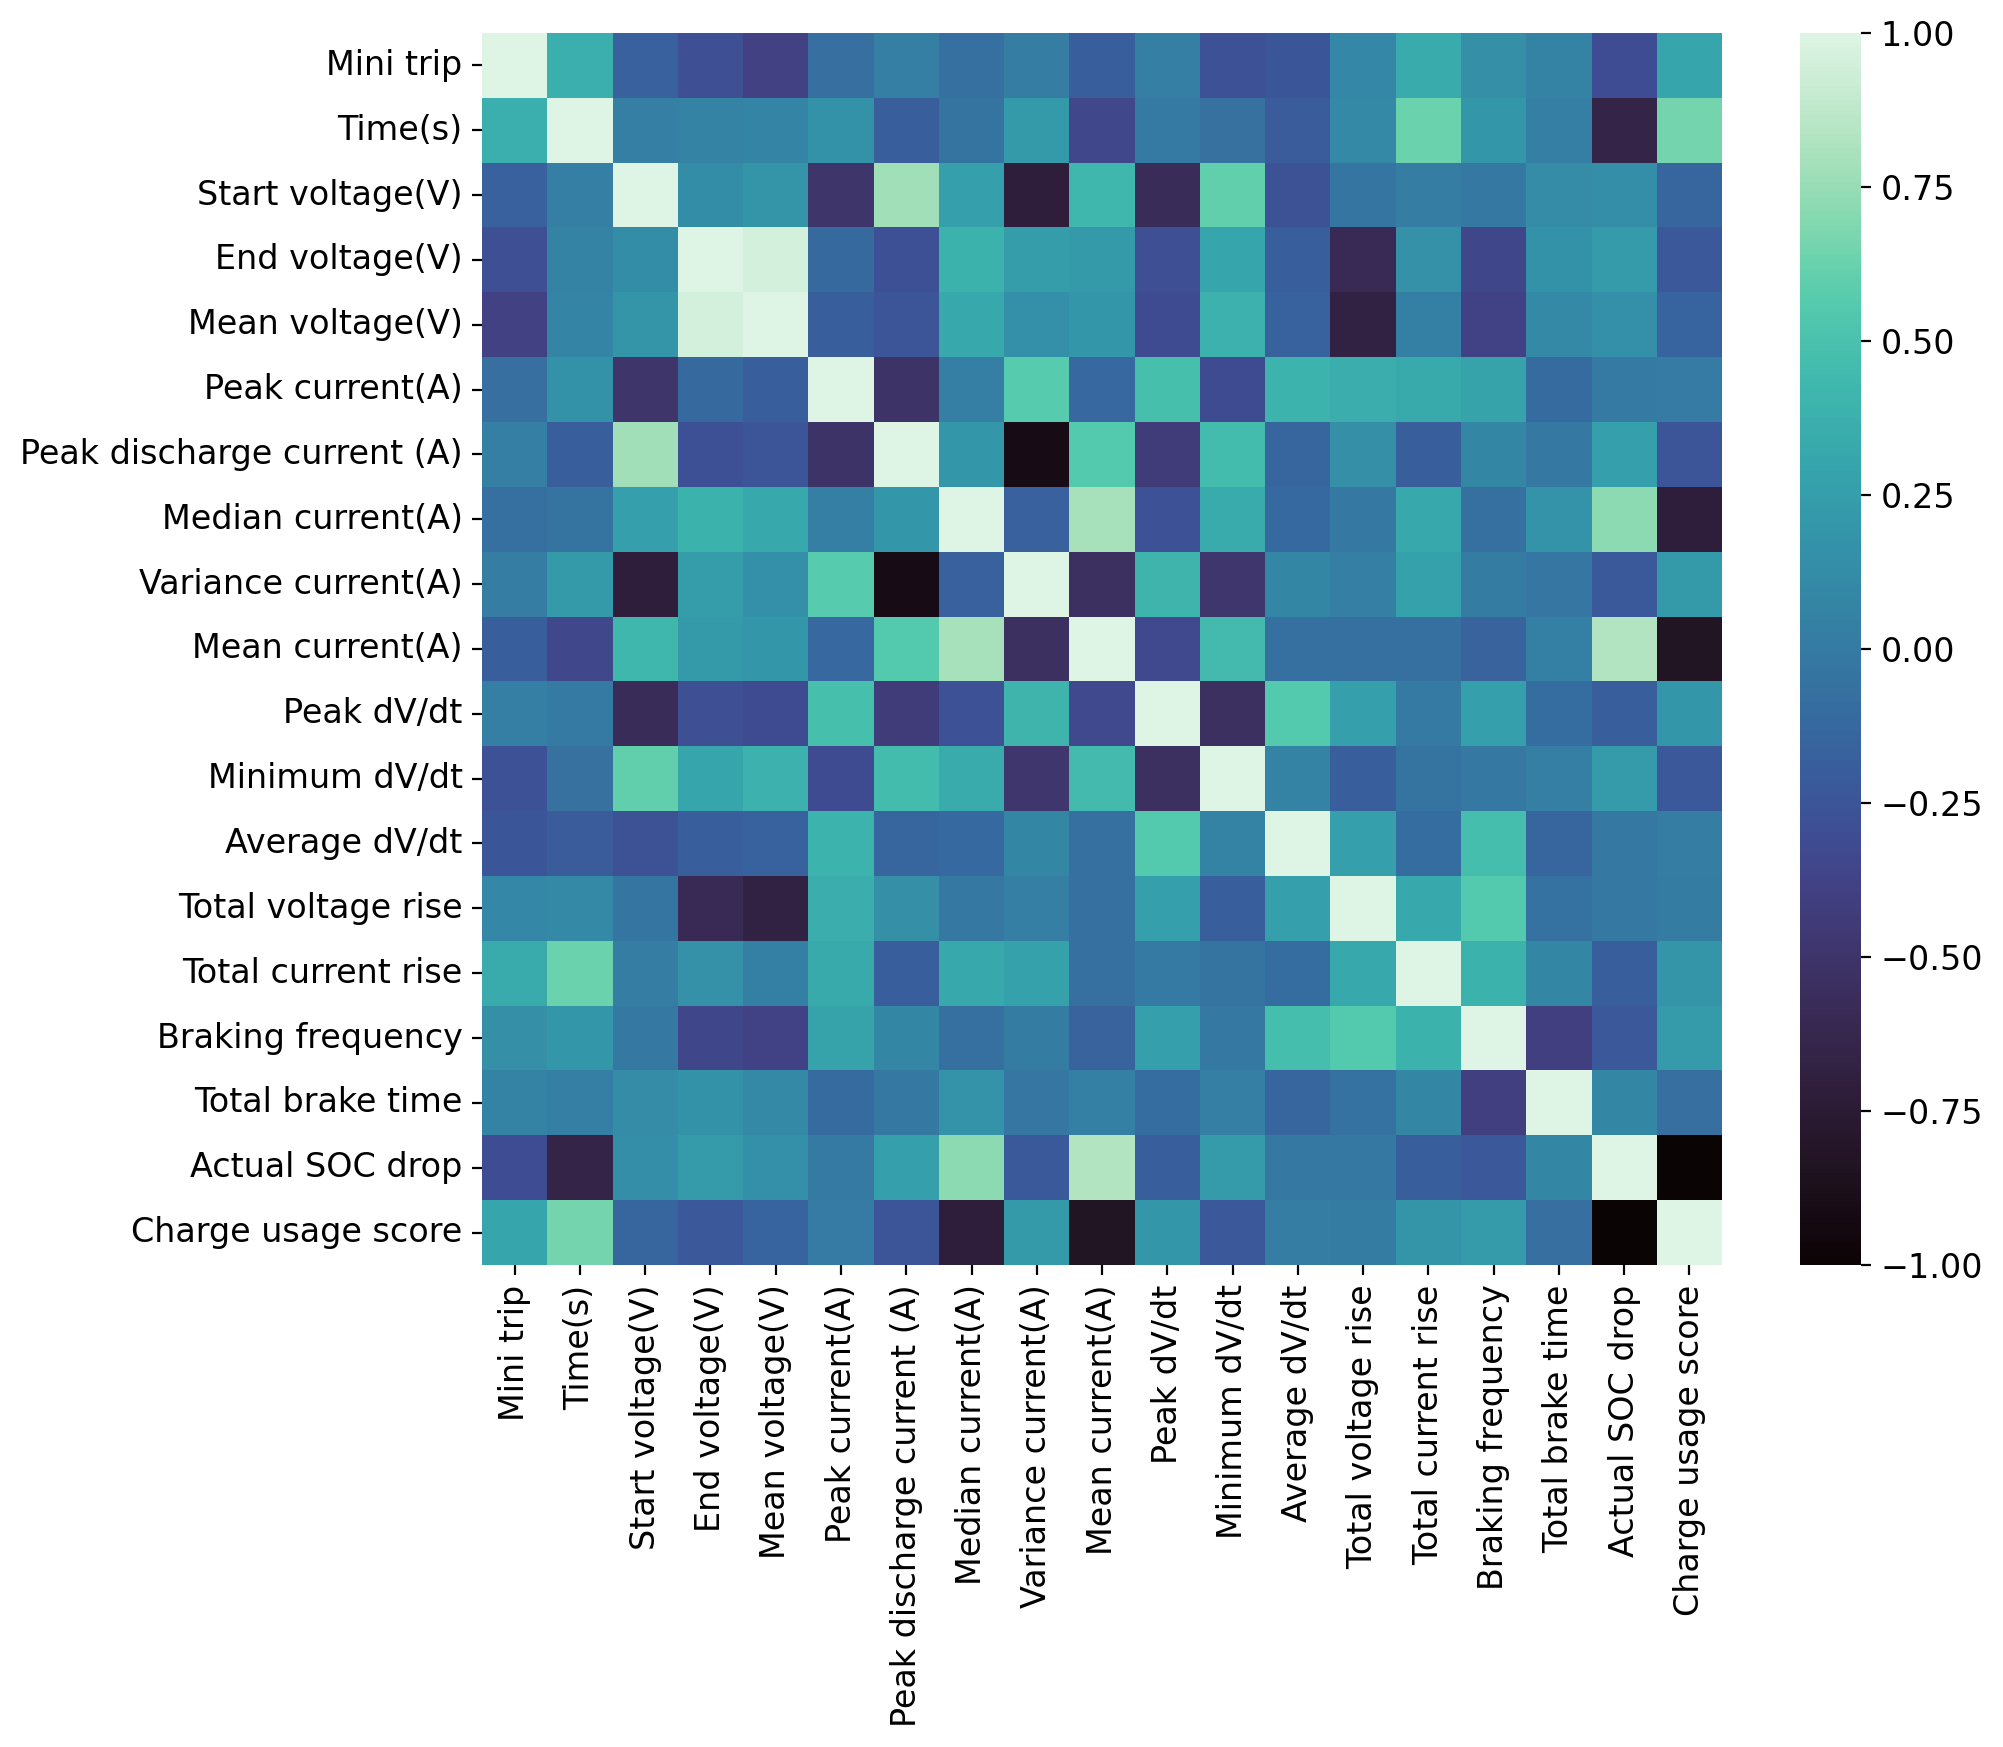

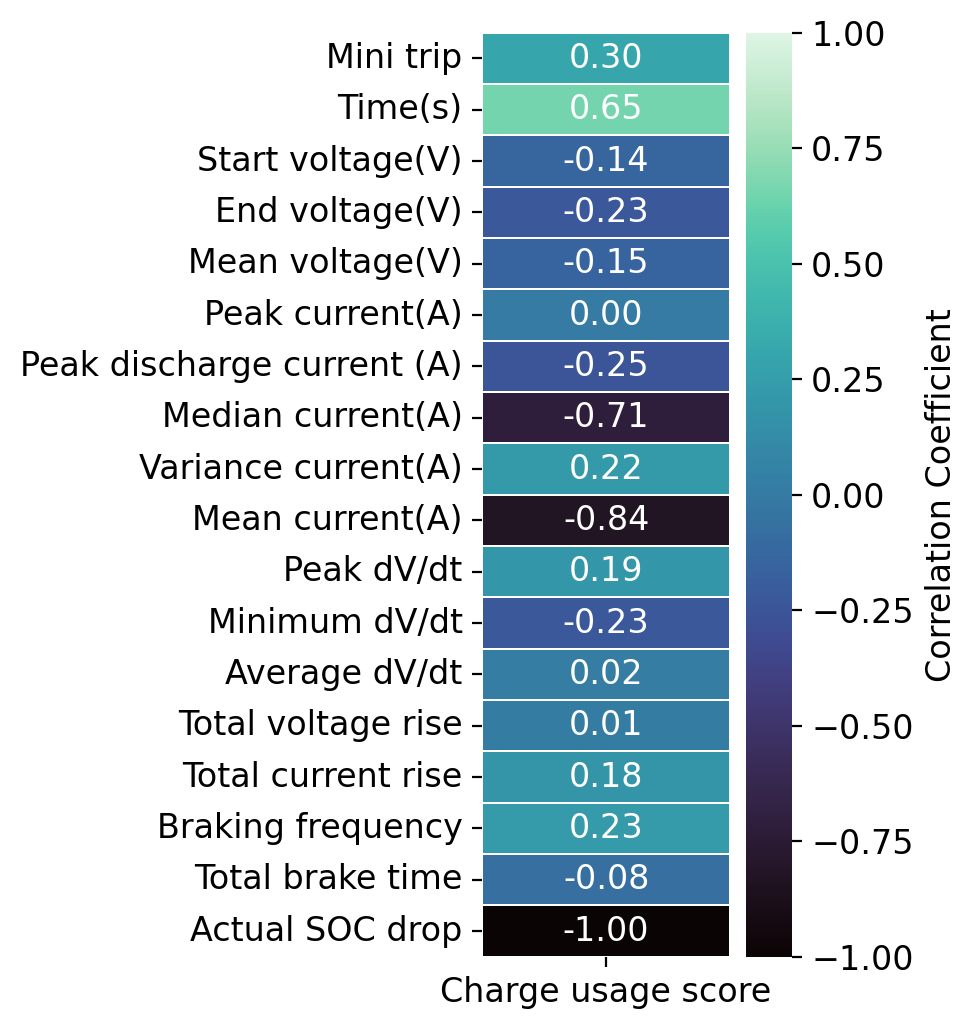

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

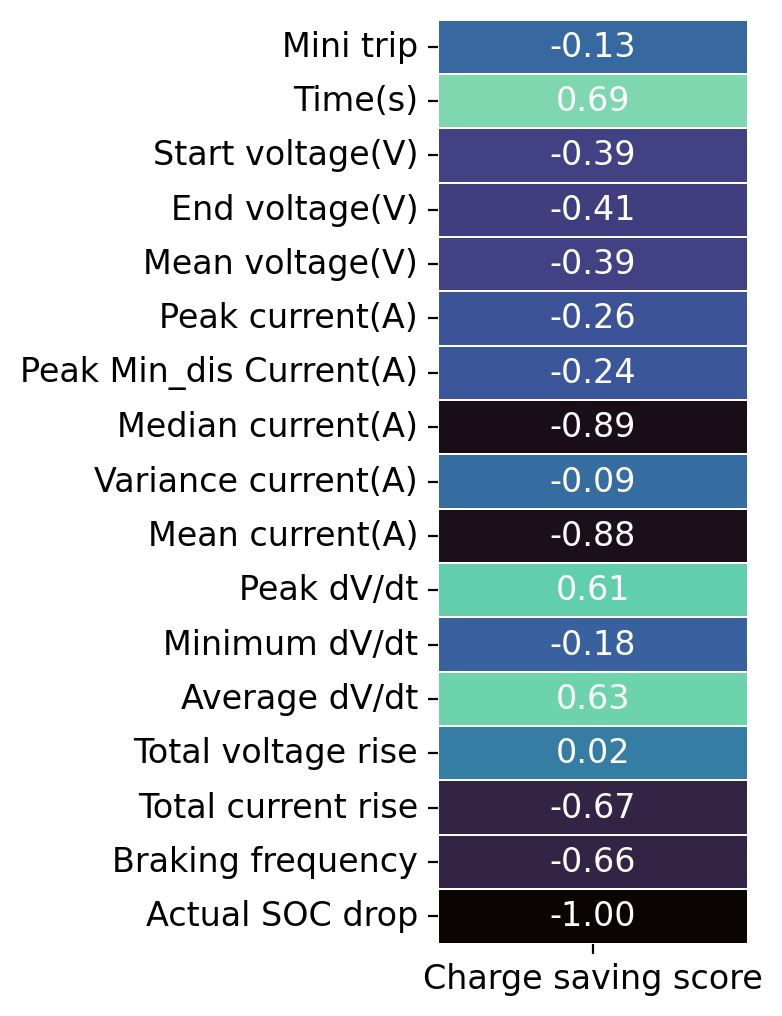

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

In [3]:
%run {FORECAST_DATA_NB}

##### Training data

In [4]:
rel_soc_array

[np.float64(-0.13229649408555544),
 np.float64(-0.2976534474760185),
 np.float64(-0.6283966251697222),
 np.float64(-0.9591572357125927),
 np.float64(-1.28986870146),
 np.float64(-1.6206225461921293)]

In [5]:
train_class_path = MISC_DIR / 'Classification_features_train.txt'

classification_train = pd.DataFrame(
    np.loadtxt(train_class_path, delimiter=',', skiprows=1),
    columns=[
        'Defensive driving style',
        'Assertive driving style',
        'Downhill terrain',
        'Flat plane terrain',
        'Uphill terrain',
        'Charge & no rest (a)',
        'No charge & no rest (b)',
        'No charge & no rest (c)',
        'No charge & no rest (d)',
        'Charge & rest (a)',
        'Charge & rest (b)',
        'Charge & rest (c)',
        'Cell ID (a)',
        'Cell ID (b)',
        'Cell ID (c)'
    ]
)

In [6]:
cut_dict_350 = {}
data_list_350 = []

for key in dict.keys():
    datafr_350 = cut_time(dict[key], 300, 350)
    data_list_350.append(datafr_350)

cut_dict_350 = {f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_350)}
cut_data_350 = features_ext(cut_dict_350)
cut_data_350['Charge Usage score 350'] = cut_data_350['SOC_drop (%)']/rel_soc_array[0]
cut_data_350 = cut_data_350.drop(columns='Relative_SOC_drop', axis =1)

cut_data_350_with_classification = pd.concat(
    [cut_data_350.reset_index(drop=True), classification_train.reset_index(drop=True)],
    axis=1)

cut_data_350_with_classification

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip  Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  40.0021          3.853367        3.840435         3.847643   
1           2  34.5564          3.825440        3.828958         3.826971   
2           3  36.0347          3.836214        3.820742         3.821352   
3           4  32.9814          3.797720        3.808939         3.804083   
4           5  42.4806          3.796045        3.789937         3.792646   
..        ...      ...               ...             ...              ...   
91         92  43.5120          3.755281        3.766108         3.760713   
92         93  39.1444          3.740973        3.727139         3.731356   
93         94  40.9557          3.703782        3.619632         3.692257   
94         95  43.4347          3.688385        3.706670         3.711750   
95         96  47.3598          3.601665        3.665031         3.635364   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.315498                -0.358489          -0.333096   
1         -0.332344                -0.355217          -0.332639   
2         -0.247821                -0.306373          -0.298523   
3         -0.296925                -0.345615          -0.306589   
4         -0.295346                -0.321400          -0.314471   
..              ...                      ...                ...   
91        -0.286446                -0.450002          -0.320795   
92        -0.334714                -0.368091          -0.357475   
93        -0.199769                -0.513600          -0.267631   
94        -0.161506                -0.293228          -0.220985   
95        -0.298848                -0.491922          -0.372065   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.000304        -0.334778  ...                   1.0   
1              0.000084        -0.336478  ...                   0.0   
2              0.000357        -0.291893  ...                   0.0   
3              0.000308        -0.310870  ...                   0.0   
4              0.000098        -0.312283  ...                   1.0   
..                  ...              ...  ...                   ...   
91             0.004907        -0.349008  ...                   0.0   
92             0.000142        -0.354350  ...                   1.0   
93             0.013640        -0.313340  ...                   0.0   
94             0.001869        -0.224417  ...                   0.0   
95             0.003684        -0.392815  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   
..                      ...                      ...                      ...   
91                      0.0                      0.0                      1.0   
92                      0.0                      0.0                      0.0   
93                      1.0                      0.0                      0.0   
94                      0.0                      1.0                      0.0   
95                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0          1.0   
1                 1.0                0.0                0.0          1.0   
2                 0.0                1.0                0.0          1.0   
3                 0.0                0.0                1.0          1.0   
4                 0.0                0.0                0.0         

In [7]:
cut_dict_400 = {}
data_list_400 = []

for key in dict.keys():
    datafr_400 = cut_time(dict[key], 300, 400)
    data_list_400.append(datafr_400)

cut_dict_400 = {f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_400)}
cut_data_400 = features_ext(cut_dict_400)
cut_data_400['Charge Usage score 400'] = cut_data_400['SOC_drop (%)']/rel_soc_array[1]
cut_data_400 = cut_data_400.drop(columns= ['Relative_SOC_drop', 'Charge Usage score 350'], axis =1)

cut_data_400_with_classification = pd.concat(
    [cut_data_400.reset_index(drop=True), classification_train.reset_index(drop=True)],
    axis=1)

cut_data_400_with_classification

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip  Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  92.3408          3.853367        3.845118         3.843591   
1           2  84.5587          3.825440        3.827247         3.827539   
2           3  88.2715          3.836214        3.848385         3.826832   
3           4  87.7146          3.797720        3.812878         3.806539   
4           5  92.4835          3.796045        3.795833         3.793357   
..        ...      ...               ...             ...              ...   
91         92  90.3563          3.755281        3.768725         3.765908   
92         93  89.1474          3.740973        3.739816         3.732803   
93         94  86.3346          3.703782        3.688422         3.639565   
94         95  91.9329          3.688385        3.685338         3.699056   
95         96  89.4531          3.601665        3.679882         3.665915   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.315498                -0.371565          -0.335647   
1         -0.332344                -0.355217          -0.332749   
2         -0.195192                -0.310548          -0.296038   
3         -0.278081                -0.345615          -0.289021   
4         -0.291863                -0.329984          -0.307145   
..              ...                      ...                ...   
91        -0.149262                -0.450002          -0.286446   
92        -0.322103                -0.368091          -0.354461   
93        -0.199769                -0.818060          -0.469704   
94        -0.161506                -0.328556          -0.276060   
95        -0.135462                -0.491922          -0.254205   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.000248        -0.338904  ...                   1.0   
1              0.000045        -0.335135  ...                   0.0   
2              0.001442        -0.274166  ...                   0.0   
3              0.000277        -0.296097  ...                   0.0   
4              0.000182        -0.307670  ...                   1.0   
..                  ...              ...  ...                   ...   
91             0.008132        -0.288566  ...                   0.0   
92             0.000243        -0.348178  ...                   1.0   
93             0.034333        -0.489068  ...                   0.0   
94             0.002671        -0.260739  ...                   0.0   
95             0.011072        -0.298039  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   
..                      ...                      ...                      ...   
91                      0.0                      0.0                      1.0   
92                      0.0                      0.0                      0.0   
93                      1.0                      0.0                      0.0   
94                      0.0                      1.0                      0.0   
95                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0          1.0   
1                 1.0                0.0                0.0          1.0   
2                 0.0                1.0                0.0          1.0   
3                 0.0                0.0                1.0          1.0   
4                 0.0                0.0                0.0         

In [8]:
cut_dict_500 = {}
data_list_500 = []

for key in dict.keys():
    datafr_500 = cut_time(dict[key], 300, 500)
    data_list_500.append(datafr_500)

cut_dict_500 = {f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_500)}
cut_data_500 = features_ext(cut_dict_500)
cut_data_500['Charge Usage score 500'] = cut_data_500['SOC_drop (%)']/rel_soc_array[2]
cut_data_500 = cut_data_500.drop(columns=['Relative_SOC_drop', 'Charge Usage score 350',  'Charge Usage score 400'], axis =1)

cut_data_500_with_classification = pd.concat(
    [cut_data_500.reset_index(drop=True), classification_train.reset_index(drop=True)],
    axis=1)

cut_data_500_with_classification

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip   Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  191.4182          3.853367        3.859400         3.851436   
1           2  188.9158          3.825440        3.833646         3.831384   
2           3  192.8358          3.836214        3.827756         3.831369   
3           4  184.4134          3.797720        3.812928         3.805397   
4           5  191.7214          3.796045        3.800097         3.797440   
..        ...       ...               ...             ...              ...   
91         92  194.9879          3.755281        3.758526         3.762640   
92         93  190.3109          3.740973        3.726331         3.740686   
93         94  186.0979          3.703782        3.684448         3.655199   
94         95  192.4436          3.688385        3.690798         3.696031   
95         96  197.5933          3.601665        3.641446         3.647694   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.160354                -0.371565          -0.321711   
1         -0.182461                -0.355217          -0.332548   
2         -0.178817                -0.310548          -0.254481   
3         -0.223990                -0.368736          -0.292896   
4         -0.168034                -0.329984          -0.290221   
..              ...                      ...                ...   
91        -0.149262                -0.450002          -0.322412   
92        -0.268022                -0.368091          -0.322060   
93        -0.199769                -0.818060          -0.357832   
94        -0.161506                -0.328556          -0.274427   
95        -0.135462                -0.530723          -0.357498   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.002868        -0.303686  ...                   1.0   
1              0.001739        -0.310836  ...                   0.0   
2              0.001627        -0.255255  ...                   0.0   
3              0.001080        -0.298884  ...                   0.0   
4              0.001440        -0.282558  ...                   1.0   
..                  ...              ...  ...                   ...   
91             0.005370        -0.310086  ...                   0.0   
92             0.001256        -0.315200  ...                   1.0   
93             0.026050        -0.443002  ...                   0.0   
94             0.001666        -0.265674  ...                   0.0   
95             0.009342        -0.348079  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   
..                      ...                      ...                      ...   
91                      0.0                      0.0                      1.0   
92                      0.0                      0.0                      0.0   
93                      1.0                      0.0                      0.0   
94                      0.0                      1.0                      0.0   
95                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0          1.0   
1                 1.0                0.0                0.0          1.0   
2                 0.0                1.0                0.0          1.0   
3                 0.0                0.0                1.0          1.0   
4                 0.0                0.0                

In [9]:
cut_dict_600 = {}
data_list_600 = []

for key in dict.keys():
    datafr_600 = cut_time(dict[key], 300, 600)
    data_list_600.append(datafr_600)

cut_dict_600 = {f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_600)}
cut_data_600 = features_ext(cut_dict_600)
cut_data_600['Charge Usage score 600'] = cut_data_600['SOC_drop (%)']/rel_soc_array[3]
cut_data_600 = cut_data_600.drop(columns=['Relative_SOC_drop', 'Charge Usage score 350',  'Charge Usage score 400', 'Charge Usage score 500'], axis =1)

cut_data_600_with_classification = pd.concat(
    [cut_data_600.reset_index(drop=True), classification_train.reset_index(drop=True)],
    axis=1)

cut_data_600_with_classification

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip   Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  293.1234          3.853367        3.899720         3.859448   
1           2  288.3840          3.825440        3.811513         3.828187   
2           3  293.6487          3.836214        3.807981         3.826373   
3           4  285.9081          3.797720        3.785812         3.795784   
4           5  290.2106          3.796045        3.837159         3.801260   
..        ...       ...               ...             ...              ...   
91         92  293.0209          3.755281        3.755457         3.762700   
92         93  284.6601          3.740973        3.740031         3.735164   
93         94  285.4527          3.703782        3.695551         3.661586   
94         95  289.3263          3.688385        3.734435         3.683663   
95         96  291.0920          3.601665        3.642384         3.659137   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.107182                -0.371565          -0.284360   
1         -0.182461                -0.371942          -0.332749   
2         -0.178817                -0.327917          -0.277916   
3         -0.223990                -0.537201          -0.304644   
4         -0.115632                -0.329984          -0.285279   
..              ...                      ...                ...   
91        -0.123577                -0.450002          -0.322134   
92        -0.268022                -0.414481          -0.328420   
93        -0.199769                -0.818060          -0.357532   
94        -0.133978                -0.533918          -0.280362   
95        -0.097804                -0.530723          -0.345946   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.006136        -0.268384  ...                   1.0   
1              0.001591        -0.319587  ...                   0.0   
2              0.001599        -0.269765  ...                   0.0   
3              0.005078        -0.330124  ...                   0.0   
4              0.002909        -0.261864  ...                   1.0   
..                  ...              ...  ...                   ...   
91             0.005503        -0.294549  ...                   0.0   
92             0.001639        -0.325549  ...                   1.0   
93             0.021512        -0.421733  ...                   0.0   
94             0.008451        -0.298243  ...                   0.0   
95             0.011508        -0.307994  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   
..                      ...                      ...                      ...   
91                      0.0                      0.0                      1.0   
92                      0.0                      0.0                      0.0   
93                      1.0                      0.0                      0.0   
94                      0.0                      1.0                      0.0   
95                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0          1.0   
1                 1.0                0.0                0.0          1.0   
2                 0.0                1.0                0.0          1.0   
3                 0.0                0.0                1.0          1.0   
4                 0.0                0.0                

In [10]:
cut_dict_700 = {}
data_list_700 = []

for key in dict.keys():
    datafr_700 = cut_time(dict[key], 300, 700)
    data_list_700.append(datafr_700)

cut_dict_700 = {f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_700)}
cut_data_700 = features_ext(cut_dict_700)
cut_data_700['Charge Usage score 700'] = cut_data_700['SOC_drop (%)']/rel_soc_array[4]
cut_data_700 = cut_data_700.drop(columns=['Relative_SOC_drop', 'Charge Usage score 350',  'Charge Usage score 400', 'Charge Usage score 500', 'Charge Usage score 600'], axis =1)

cut_data_700_with_classification = pd.concat(
    [cut_data_700.reset_index(drop=True), classification_train.reset_index(drop=True)],
    axis=1)

cut_data_700_with_classification

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip   Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  392.9196          3.853367        3.840640         3.868323   
1           2  388.5218          3.825440        3.812049         3.823998   
2           3  393.6515          3.836214        3.808740         3.821859   
3           4  385.7115          3.797720        3.804272         3.795513   
4           5  396.9701          3.796045        3.775873         3.807767   
..        ...       ...               ...             ...              ...   
91         92  393.0268          3.755281        3.752217         3.761028   
92         93  384.1347          3.740973        3.713910         3.723049   
93         94  384.0611          3.703782        3.703224         3.667576   
94         95  390.4401          3.688385        3.667846         3.683335   
95         96  397.2916          3.601665        3.637331         3.655419   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.029862                -0.371565          -0.260011   
1         -0.182461                -0.379497          -0.336712   
2         -0.178817                -0.359104          -0.295083   
3         -0.223990                -0.537201          -0.304644   
4         -0.024798                -0.344341          -0.268869   
..              ...                      ...                ...   
91        -0.123577                -0.450002          -0.322412   
92        -0.268022                -0.568212          -0.341083   
93        -0.199769                -0.818060          -0.357464   
94        -0.107694                -0.533918          -0.292543   
95        -0.097804                -0.530723          -0.352160   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.009878        -0.233038  ...                   1.0   
1              0.001504        -0.329174  ...                   0.0   
2              0.002110        -0.284028  ...                   0.0   
3              0.004378        -0.324938  ...                   0.0   
4              0.007846        -0.233715  ...                   1.0   
..                  ...              ...  ...                   ...   
91             0.004523        -0.298485  ...                   0.0   
92             0.005499        -0.350610  ...                   1.0   
93             0.020241        -0.401155  ...                   0.0   
94             0.008123        -0.296319  ...                   0.0   
95             0.009762        -0.316140  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   
..                      ...                      ...                      ...   
91                      0.0                      0.0                      1.0   
92                      0.0                      0.0                      0.0   
93                      1.0                      0.0                      0.0   
94                      0.0                      1.0                      0.0   
95                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0          1.0   
1                 1.0                0.0                0.0          1.0   
2                 0.0                1.0                0.0          1.0   
3                 0.0                0.0                1.0          1.0   
4                 0.0                0.0                

In [11]:
cut_dict_800 = {}
data_list_800 = []

for key in dict.keys():
    datafr_800 = cut_time(dict[key], 300, 800)
    data_list_800.append(datafr_800)

cut_dict_800 = {f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_800)}
cut_data_800 = features_ext(cut_dict_800)
cut_data_800['Charge Usage score 800'] = cut_data_800['SOC_drop (%)']/rel_soc_array[5]
cut_data_800 = cut_data_800.drop(columns=['Relative_SOC_drop', 'Charge Usage score 350',  'Charge Usage score 400', 'Charge Usage score 500', 'Charge Usage score 600', 'Charge Usage score 700'], axis =1)

cut_data_800_with_classification = pd.concat(
    [cut_data_800.reset_index(drop=True), classification_train.reset_index(drop=True)],
    axis=1)

cut_data_800_with_classification

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip   Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  498.2785          3.853367        3.846318         3.861675   
1           2  482.1791          3.825440        3.809607         3.821051   
2           3  494.4990          3.836214        3.813374         3.819919   
3           4  489.5848          3.797720        3.769630         3.795607   
4           5  496.6855          3.796045        3.792684         3.802303   
..        ...       ...               ...             ...              ...   
91         92  496.5359          3.755281        3.754886         3.760149   
92         93  487.6598          3.740973        3.717616         3.723380   
93         94  491.2119          3.703782        3.698575         3.677905   
94         95  484.1548          3.688385        3.656023         3.678666   
95         96  497.8600          3.601665        3.651608         3.657131   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.029862                -0.371565          -0.290050   
1         -0.182461                -0.379497          -0.339989   
2         -0.178817                -0.359104          -0.295083   
3         -0.223990                -0.537201          -0.301091   
4         -0.024798                -0.385378          -0.280622   
..              ...                      ...                ...   
91        -0.123577                -0.450002          -0.294712   
92        -0.218840                -0.568212          -0.332925   
93        -0.166904                -0.818060          -0.357337   
94        -0.107694                -0.533918          -0.298938   
95        -0.097804                -0.530723          -0.304893   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.009414        -0.253142  ...                   1.0   
1              0.001335        -0.334662  ...                   0.0   
2              0.001730        -0.286618  ...                   0.0   
3              0.003937        -0.320272  ...                   0.0   
4              0.007163        -0.248240  ...                   1.0   
..                  ...              ...  ...                   ...   
91             0.004241        -0.292415  ...                   0.0   
92             0.005091        -0.342327  ...                   1.0   
93             0.021922        -0.365208  ...                   0.0   
94             0.007495        -0.307075  ...                   0.0   
95             0.008849        -0.306705  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       0.0                      0.0                      0.0   
2                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   
..                      ...                      ...                      ...   
91                      0.0                      0.0                      1.0   
92                      0.0                      0.0                      0.0   
93                      1.0                      0.0                      0.0   
94                      0.0                      1.0                      0.0   
95                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0          1.0   
1                 1.0                0.0                0.0          1.0   
2                 0.0                1.0                0.0          1.0   
3                 0.0                0.0                1.0          1.0   
4                 0.0                0.0                

In [12]:
print(cut_data_350_with_classification['SOC_drop (%)'])
print(cut_data_400_with_classification['SOC_drop (%)'])
print(cut_data_500_with_classification['SOC_drop (%)'])
print(cut_data_600_with_classification['SOC_drop (%)'])
print(cut_data_700_with_classification['SOC_drop (%)'])
print(cut_data_800_with_classification['SOC_drop (%)'])

0    -0.125784
1    -0.106497
2    -0.099909
3    -0.092394
4    -0.121169
        ...   
91   -0.134525
92   -0.129575
93   -0.093126
94   -0.081837
95   -0.156825
Name: SOC_drop (%), Length: 96, dtype: float64
0    -0.292466
1    -0.260913
2    -0.220473
3    -0.236982
4    -0.260628
        ...   
91   -0.228402
92   -0.287349
93   -0.278883
94   -0.218638
95   -0.241344
Name: SOC_drop (%), Length: 96, dtype: float64
0    -0.554184
1    -0.555183
2    -0.443613
3    -0.506081
4    -0.502381
        ...   
91   -0.547961
92   -0.560942
93   -0.609085
94   -0.467110
95   -0.611981
Name: SOC_drop (%), Length: 96, dtype: float64
0    -0.750157
1    -0.869357
2    -0.724684
3    -0.830975
4    -0.691426
        ...   
91   -0.785161
92   -0.866461
93   -0.932019
94   -0.722576
95   -0.846804
Name: SOC_drop (%), Length: 96, dtype: float64
0    -0.873508
1    -1.203167
2    -1.039187
3    -1.111688
4    -0.827553
        ...   
91   -1.073215
92   -1.183439
93   -1.200368
94   -1.020374
95

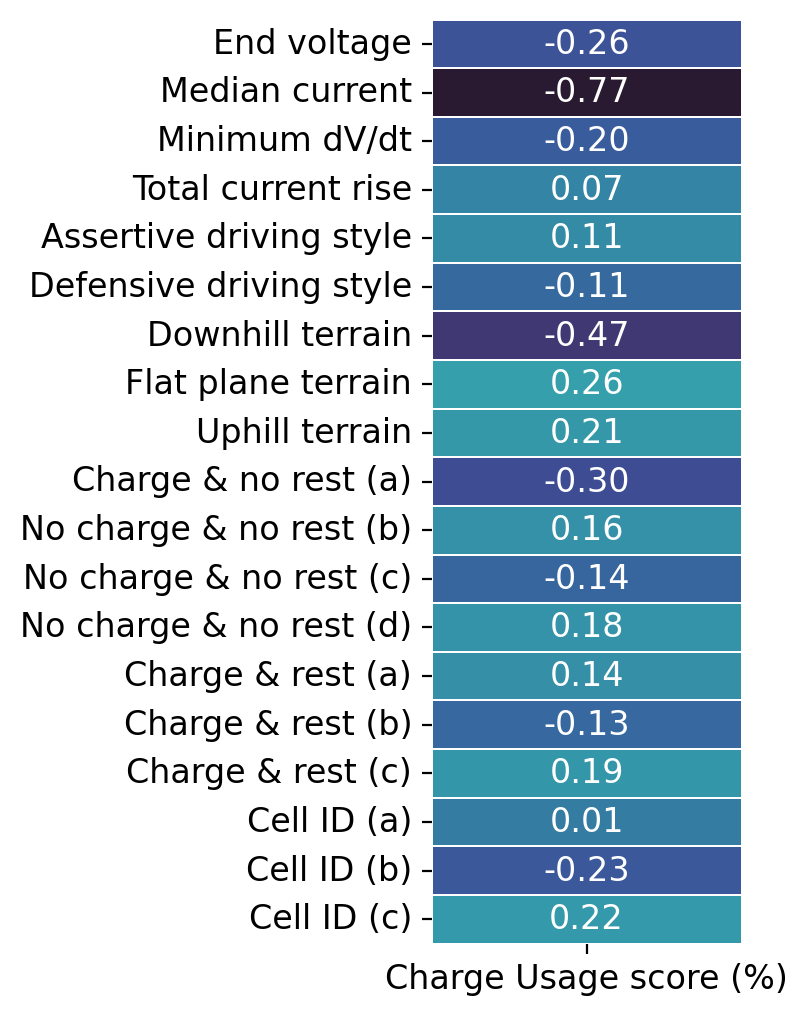

In [13]:
corr_matrix = cut_data_800_with_classification.corr()
target_corr = corr_matrix[["Charge Usage score 800"]].drop(["Charge Usage score 800"])
target_corr_renamed = target_corr.rename(columns={"Charge Usage score 800": "Charge Usage score (%)"})
feature_name_mapping = {
    'End Voltage(V)': 'End voltage',
    'Median Current(A)': 'Median current',
    'Min dV/dt': 'Minimum dV/dt',
    'Total Current Rise': 'Total current rise'
}

features_selected = ['End voltage', 'Median current', 'Minimum dV/dt', 'Total current rise', 'Assertive driving style',
       'Defensive driving style', 'Downhill terrain', 'Flat plane terrain',
       'Uphill terrain', 'Charge & no rest (a)', 'No charge & no rest (b)',
       'No charge & no rest (c)', 'No charge & no rest (d)',
       'Charge & rest (a)', 'Charge & rest (b)', 'Charge & rest (c)',
       'Cell ID (a)', 'Cell ID (b)', 'Cell ID (c)']

target_corr_renamed = target_corr_renamed.rename(index=feature_name_mapping)
features_selected_renamed = [feature_name_mapping.get(feature, feature) for feature in features_selected]
target_corr_filtered = target_corr_renamed.loc[features_selected_renamed]



plt.figure(figsize=(2, 6))
sns.heatmap(
    target_corr_filtered,
    annot=True,
    cmap="mako",
    fmt=".2f",
    vmin=-1,
    vmax=1,
    linewidths=0.01,
    annot_kws={"color": "white"},  
    cbar_kws={"label": "Correlation Coefficient"} , cbar = False
)

# plt.gcf().savefig('/Users/hemanthnr/Desktop/correlation_currentmodels.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()

#### combined training data (features)

In [14]:
X_train = cut_data_350_with_classification.drop("Charge Usage score 350", axis=1)
X_train = X_train[['End Voltage(V)', 'Median Current(A)', 'Min dV/dt', 'Total Current Rise', 'Assertive driving style',
        'Defensive driving style',
        'Downhill terrain', 
        'Flat plane terrain', 
        'Uphill terrain',
        'Charge & no rest (a)',
        'No charge & no rest (b)',
        'No charge & no rest (c)',
        'No charge & no rest (d)',
        'Charge & rest (a)',
        'Charge & rest (b)',
        'Charge & rest (c)',
        'Cell ID (a)',
        'Cell ID (b)',
        'Cell ID (c)']]

#### combined training data (target)

In [15]:
y_train_350 = cut_data_350_with_classification["Charge Usage score 350"]
y_train_400 = cut_data_400_with_classification["Charge Usage score 400"]
y_train_500 = cut_data_500_with_classification["Charge Usage score 500"]
y_train_600 = cut_data_600_with_classification["Charge Usage score 600"]
y_train_700 = cut_data_700_with_classification["Charge Usage score 700"]
y_train_800 = cut_data_800_with_classification["Charge Usage score 800"]

Y_train = 100 * pd.DataFrame({
    "Charge Usage score 350": y_train_350,
    "Charge Usage score 400": y_train_400,
    "Charge Usage score 500": y_train_500,
    "Charge Usage score 600": y_train_600,
    "Charge Usage score 700": y_train_700,
    "Charge Usage score 800": y_train_800,
})

## Tetsing data

In [16]:
classification_test_path = MISC_DIR / 'Classification_features_test.txt'

classification_test = pd.DataFrame(
    np.loadtxt(classification_test_path, delimiter=',', skiprows=1),
    columns=['Defensive driving style',
        'Assertive driving style',
        'Downhill terrain', 
        'Flat plane terrain', 
        'Uphill terrain',
        'Charge & no rest (a)',
        'No charge & no rest (b)',
        'No charge & no rest (c)',
        'No charge & no rest (d)',
        'Charge & rest (a)',
        'Charge & rest (b)',
        'Charge & rest (c)',
        'Cell ID (a)',
        'Cell ID (b)',
        'Cell ID (c)'
    ]
)

In [17]:
cut_dict_test_300_350={}
data_list_test_300_350=[]
for key in dict_test.keys():
    datafr_350_test = cut_time(dict_test[key], 300, 350)  ##Function to select the time limit till what we want to cut down the data to
    data_list_test_300_350.append(datafr_350_test)
cut_dict_test_300_350={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_test_300_350)}

cut_data_350_test = features_ext_test(cut_dict_test_300_350)
cut_data_350_test['Charge saving score 350'] = cut_data_350_test['SOC_drop (%)']/rel_soc_array[0]
cut_data_350_test = cut_data_350_test.drop(columns='Relative_SOC_drop', axis =1)

cut_data_350_test = pd.concat(
    [cut_data_350_test.reset_index(drop=True), classification_test.reset_index(drop=True)],
    axis=1)

cut_data_350_test[:14]

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip  Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  40.0092          3.839883        3.841950         3.842150   
1           2  40.0057          3.818634        3.809680         3.814415   
2           3  40.0099          3.842140        3.843057         3.842680   
3           4  40.0078          3.815004        3.808755         3.811939   
4           5  47.9190          3.657783        3.685990         3.667313   
5           6  38.0133          3.677652        3.643440         3.661131   
6           7  40.0027          3.806461        3.818501         3.813766   
7           8  40.0014          3.769205        3.766803         3.768266   
8           9  40.0029          3.844823        3.857441         3.852352   
9          10  40.0030          3.806447        3.804986         3.806025   
10         11  47.5955          3.761253        3.839254         3.802743   
11         12  40.0045          3.696546        3.692918         3.695306   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.380581                -0.423015          -0.393884   
1         -0.304332                -0.378248          -0.340619   
2         -0.324208                -0.396313          -0.335324   
3         -0.298760                -0.331595          -0.319680   
4         -0.342216                -0.439259          -0.387445   
5         -0.303039                -0.372706          -0.337080   
6         -0.093350                -0.252420          -0.142985   
7         -0.333085                -0.340822          -0.336564   
8         -0.101638                -0.254720          -0.154136   
9         -0.296117                -0.306126          -0.299727   
10        -0.082044                -0.254273          -0.157818   
11        -0.332772                -0.341270          -0.335874   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.000280        -0.397788  ...                   1.0   
1              0.000860        -0.340886  ...                   0.0   
2              0.001003        -0.352009  ...                   0.0   
3              0.000184        -0.319446  ...                   0.0   
4              0.000764        -0.391859  ...                   1.0   
5              0.000770        -0.337614  ...                   0.0   
6              0.003801        -0.155560  ...                   0.0   
7              0.000010        -0.336079  ...                   0.0   
8              0.003537        -0.164706  ...                   1.0   
9              0.000014        -0.300638  ...                   0.0   
10             0.003370        -0.161041  ...                   0.0   
11             0.000013        -0.337136  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       1.0                      0.0                      0.0   
2                       0.0                      1.0                      0.0   
3                       0.0                      0.0                      1.0   
4                       0.0                      0.0                      0.0   
5                       1.0                      0.0                      0.0   
6                       0.0                      1.0                      0.0   
7                       0.0                      0.0                      1.0   
8                       0.0                      0.0                      0.0   
9                       1.0                      0.0                      0.0   
10                      0.0                      1.0                      0.0   
11                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0          1.0   


In [18]:
cut_dict_test_400={}
data_list_test_400=[]
for key in dict_test.keys():
    datafr_400_test = cut_time(dict_test[key], 300, 400)  ##Function to select the time limit till what we want to cut down the data to
    data_list_test_400.append(datafr_400_test)
cut_dict_test_400 ={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_test_400)}

cut_data_400_test = features_ext_test(cut_dict_test_400)
cut_data_400_test['Charge saving score 400'] = cut_data_400_test['SOC_drop (%)']/rel_soc_array[1]
cut_data_400_test = cut_data_400_test.drop(columns= ['Relative_SOC_drop', 'Charge saving score 350'], axis =1)
cut_data_400_test = pd.concat(
    [cut_data_400_test.reset_index(drop=True), classification_test.reset_index(drop=True)],
    axis=1)

cut_data_400_test

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip  Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  96.2584          3.839883        3.841490         3.845351   
1           2  90.0153          3.818634        3.818428         3.814615   
2           3  98.9596          3.842140        3.840350         3.844586   
3           4  90.0148          3.815004        3.816894         3.812615   
4           5  97.4985          3.657783        3.667599         3.693211   
5           6  92.7804          3.677652        3.704055         3.667550   
6           7  87.9650          3.806461        3.796920         3.810247   
7           8  90.0043          3.769205        3.768905         3.768095   
8           9  92.2170          3.844823        3.836556         3.849807   
9          10  90.0050          3.806447        3.805844         3.805814   
10         11  94.5289          3.761253        3.718742         3.786386   
11         12  90.0068          3.696546        3.707828         3.698263   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.200052                -0.423015          -0.380581   
1         -0.236678                -0.378248          -0.323537   
2         -0.182106                -0.396313          -0.328787   
3         -0.228073                -0.343797          -0.307219   
4         -0.192294                -0.439259          -0.343269   
5         -0.233915                -0.391770          -0.324633   
6         -0.071189                -0.324862          -0.183861   
7         -0.300115                -0.340822          -0.333078   
8         -0.078986                -0.326652          -0.186706   
9         -0.273539                -0.306126          -0.296742   
10        -0.061082                -0.337472          -0.193938   
11        -0.300833                -0.341270          -0.332784   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.004362        -0.351456  ...                   1.0   
1              0.002058        -0.316299  ...                   0.0   
2              0.003551        -0.314302  ...                   0.0   
3              0.001543        -0.297694  ...                   0.0   
4              0.005166        -0.328925  ...                   1.0   
5              0.002169        -0.321149  ...                   0.0   
6              0.007680        -0.192319  ...                   0.0   
7              0.000210        -0.326442  ...                   0.0   
8              0.007079        -0.191742  ...                   1.0   
9              0.000131        -0.292713  ...                   0.0   
10             0.006402        -0.194854  ...                   0.0   
11             0.000211        -0.327209  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       1.0                      0.0                      0.0   
2                       0.0                      1.0                      0.0   
3                       0.0                      0.0                      1.0   
4                       0.0                      0.0                      0.0   
5                       1.0                      0.0                      0.0   
6                       0.0                      1.0                      0.0   
7                       0.0                      0.0                      1.0   
8                       0.0                      0.0                      0.0   
9                       1.0                      0.0                      0.0   
10                      0.0                      1.0                      0.0   
11                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0          1.0   


In [19]:
cut_dict_test_500={}
data_list_test_500=[]
for key in dict_test.keys():
    datafr_500_test = cut_time(dict_test[key], 300, 500)  ##Function to select the time limit till what we want to cut down the data to
    data_list_test_500.append(datafr_500_test)
cut_dict_test_500 ={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_test_500)}

cut_data_500_test = features_ext_test(cut_dict_test_500)
cut_data_500_test['Charge saving score 500'] = cut_data_500_test['SOC_drop (%)']/rel_soc_array[2]
cut_data_500_test = cut_data_500_test.drop(columns=['Relative_SOC_drop', 'Charge saving score 350',  'Charge saving score 400'], axis =1)
cut_data_500_test = pd.concat(
    [cut_data_500_test.reset_index(drop=True), classification_test.reset_index(drop=True)],
    axis=1)
cut_data_500_test

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip   Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  196.2757          3.839883        3.841633         3.843406   
1           2  189.4530          3.818634        3.801280         3.811349   
2           3  198.9719          3.842140        3.839731         3.842513   
3           4  192.8664          3.815004        3.804117         3.810954   
4           5  197.5124          3.657783        3.686723         3.688387   
5           6  191.1517          3.677652        3.645135         3.656578   
6           7  192.1078          3.806461        3.785449         3.797595   
7           8  195.1151          3.769205        3.765807         3.764831   
8           9  190.2029          3.844823        3.827984         3.839347   
9          10  197.9742          3.806447        3.802969         3.802177   
10         11  197.7696          3.761253        3.710072         3.726560   
11         12  193.9999          3.696546        3.699931         3.685779   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.200052                -0.423015          -0.357013   
1         -0.218235                -0.490156          -0.304332   
2         -0.182106                -0.396313          -0.306167   
3         -0.207504                -0.420739          -0.285790   
4         -0.192294                -0.439259          -0.343573   
5         -0.215370                -0.505642          -0.334874   
6         -0.071189                -0.521229          -0.355594   
7         -0.294194                -0.434737          -0.336830   
8         -0.078986                -0.483710          -0.326652   
9         -0.256823                -0.379907          -0.299727   
10        -0.061082                -0.580699          -0.356902   
11        -0.295094                -0.437701          -0.341270   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.002383        -0.350530  ...                   1.0   
1              0.004701        -0.318612  ...                   0.0   
2              0.001977        -0.310739  ...                   0.0   
3              0.002828        -0.291518  ...                   0.0   
4              0.003729        -0.335485  ...                   1.0   
5              0.006146        -0.342005  ...                   0.0   
6              0.015362        -0.295677  ...                   0.0   
7              0.001142        -0.342935  ...                   0.0   
8              0.012540        -0.273482  ...                   1.0   
9              0.000969        -0.306890  ...                   0.0   
10             0.020569        -0.326087  ...                   0.0   
11             0.001254        -0.349245  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       1.0                      0.0                      0.0   
2                       0.0                      1.0                      0.0   
3                       0.0                      0.0                      1.0   
4                       0.0                      0.0                      0.0   
5                       1.0                      0.0                      0.0   
6                       0.0                      1.0                      0.0   
7                       0.0                      0.0                      1.0   
8                       0.0                      0.0                      0.0   
9                       1.0                      0.0                      0.0   
10                      0.0                      1.0                      0.0   
11                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0    

In [20]:
cut_dict_test_600={}
data_list_test_600=[]
for key in dict_test.keys():
    datafr_600_test = cut_time(dict_test[key], 300, 600)  ##Function to select the time limit till what we want to cut down the data to
    data_list_test_600.append(datafr_600_test)
cut_dict_test_600 ={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_test_600)}

cut_data_600_test = features_ext_test(cut_dict_test_600)
cut_data_600_test['Charge saving score 600'] = cut_data_600_test['SOC_drop (%)']/rel_soc_array[3]
cut_data_600_test = cut_data_600_test.drop(columns=['Relative_SOC_drop', 'Charge saving score 350',  'Charge saving score 400', 'Charge saving score 500'], axis =1)
cut_data_600_test = pd.concat(
    [cut_data_600_test.reset_index(drop=True), classification_test.reset_index(drop=True)],
    axis=1)
cut_data_600_test

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip   Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  296.2875          3.839883        3.840515         3.842765   
1           2  289.4733          3.818634        3.802793         3.807581   
2           3  298.9897          3.842140        3.837298         3.841301   
3           4  292.8793          3.815004        3.807806         3.808744   
4           5  297.5272          3.657783        3.700524         3.689819   
5           6  295.2034          3.677652        3.691086         3.657109   
6           7  292.1119          3.806461        3.780556         3.792810   
7           8  295.1204          3.769205        3.762745         3.765299   
8           9  297.9937          3.844823        3.833319         3.833675   
9          10  297.9786          3.806447        3.796494         3.801905   
10         11  297.2628          3.761253        3.741150         3.723533   
11         12  292.7283          3.696546        3.697807         3.694594   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.200052                -0.423015          -0.332862   
1         -0.218235                -0.490156          -0.337440   
2         -0.182106                -0.396313          -0.293858   
3         -0.207504                -0.420739          -0.297902   
4         -0.192294                -0.439259          -0.326632   
5         -0.215370                -0.505642          -0.337642   
6         -0.071189                -0.521229          -0.356999   
7         -0.225322                -0.434737          -0.332301   
8         -0.078986                -0.483710          -0.329161   
9         -0.218674                -0.379907          -0.293611   
10        -0.061082                -0.580699          -0.356940   
11        -0.236338                -0.437701          -0.331653   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.002182        -0.334653  ...                   1.0   
1              0.003431        -0.325278  ...                   0.0   
2              0.001626        -0.299168  ...                   0.0   
3              0.002043        -0.293164  ...                   0.0   
4              0.003068        -0.327367  ...                   1.0   
5              0.004780        -0.338524  ...                   0.0   
6              0.011093        -0.315480  ...                   0.0   
7              0.002063        -0.320696  ...                   0.0   
8              0.010027        -0.295539  ...                   1.0   
9              0.001409        -0.290654  ...                   0.0   
10             0.016131        -0.329692  ...                   0.0   
11             0.002293        -0.324526  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       1.0                      0.0                      0.0   
2                       0.0                      1.0                      0.0   
3                       0.0                      0.0                      1.0   
4                       0.0                      0.0                      0.0   
5                       1.0                      0.0                      0.0   
6                       0.0                      1.0                      0.0   
7                       0.0                      0.0                      1.0   
8                       0.0                      0.0                      0.0   
9                       1.0                      0.0                      0.0   
10                      0.0                      1.0                      0.0   
11                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0    

In [21]:
cut_dict_test_700={}
data_list_test_700=[]
for key in dict_test.keys():
    datafr_700_test = cut_time(dict_test[key], 300, 700)  ##Function to select the time limit till what we want to cut down the data to
    data_list_test_700.append(datafr_700_test)
cut_dict_test_700 ={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_test_700)}

cut_data_700_test = features_ext_test(cut_dict_test_700)
cut_data_700_test['Charge saving score 700'] = cut_data_700_test['SOC_drop (%)']/rel_soc_array[4]
cut_data_700_test = cut_data_700_test.drop(columns=['Relative_SOC_drop', 'Charge saving score 350',  'Charge saving score 400', 'Charge saving score 500', 'Charge saving score 600'], axis =1)
cut_data_700_test = pd.concat(
    [cut_data_700_test.reset_index(drop=True), classification_test.reset_index(drop=True)],
    axis=1)
cut_data_700_test

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip   Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  396.3020          3.839883        3.833367         3.841794   
1           2  389.4931          3.818634        3.796253         3.805413   
2           3  399.0053          3.842140        3.830186         3.839758   
3           4  392.8983          3.815004        3.801585         3.807375   
4           5  389.9322          3.657783        3.678390         3.691283   
5           6  395.9699          3.677652        3.668287         3.660585   
6           7  392.1162          3.806461        3.781788         3.789627   
7           8  395.1253          3.769205        3.758938         3.764240   
8           9  392.0212          3.844823        3.823030         3.831049   
9          10  397.9853          3.806447        3.793912         3.800449   
10         11  390.2935          3.761253        3.725551         3.721179   
11         12  392.7402          3.696546        3.688985         3.694608   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.200052                -0.423015          -0.319776   
1         -0.218235                -0.490156          -0.298171   
2         -0.182106                -0.396313          -0.289984   
3         -0.207504                -0.420739          -0.283216   
4         -0.192294                -0.439259          -0.315975   
5         -0.215370                -0.505642          -0.319577   
6         -0.071189                -0.521229          -0.357062   
7         -0.225322                -0.434737          -0.311273   
8         -0.078986                -0.483710          -0.321415   
9         -0.218674                -0.379907          -0.284686   
10        -0.061082                -0.580699          -0.356901   
11        -0.236338                -0.437701          -0.312392   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.002167        -0.323798  ...                   1.0   
1              0.002870        -0.316989  ...                   0.0   
2              0.001455        -0.292433  ...                   0.0   
3              0.001704        -0.287501  ...                   0.0   
4              0.002827        -0.319395  ...                   1.0   
5              0.004367        -0.328174  ...                   0.0   
6              0.008622        -0.320960  ...                   0.0   
7              0.001596        -0.317165  ...                   0.0   
8              0.007750        -0.295923  ...                   1.0   
9              0.001076        -0.288427  ...                   0.0   
10             0.012904        -0.330768  ...                   0.0   
11             0.001883        -0.320998  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       1.0                      0.0                      0.0   
2                       0.0                      1.0                      0.0   
3                       0.0                      0.0                      1.0   
4                       0.0                      0.0                      0.0   
5                       1.0                      0.0                      0.0   
6                       0.0                      1.0                      0.0   
7                       0.0                      0.0                      1.0   
8                       0.0                      0.0                      0.0   
9                       1.0                      0.0                      0.0   
10                      0.0                      1.0                      0.0   
11                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0    

In [22]:
cut_dict_test_800={}
data_list_test_800=[]
for key in dict_test.keys():
    datafr_800_test = cut_time(dict_test[key], 300, 800)  ##Function to select the time limit till what we want to cut down the data to
    data_list_test_800.append(datafr_800_test)
cut_dict_test_800 ={f'Minitrip{i+1}': dataf for i, dataf in enumerate(data_list_test_800)}

cut_data_800_test = features_ext_test(cut_dict_test_800)
cut_data_800_test['Charge saving score 800'] = cut_data_800_test['SOC_drop (%)']/rel_soc_array[5]
cut_data_800_test = cut_data_800_test.drop(columns=['Relative_SOC_drop', 'Charge saving score 350',  'Charge saving score 400', 'Charge saving score 500', 'Charge saving score 600', 'Charge saving score 700'], axis =1)
cut_data_800_test = pd.concat(
    [cut_data_800_test.reset_index(drop=True), classification_test.reset_index(drop=True)],
    axis=1)
cut_data_800_test

/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integration = np.trapz(currnp, timenp)
/var/folders/20/47db4tl16cs85c5h4w_qwyt00000gn/T/ipykernel_6774/367856195.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integra

Mini Trip   Time(s)  Start Voltage(V)  End Voltage(V)  Mean Voltage(V)  \
0           1  496.3182          3.839883        3.827207         3.839476   
1           2  489.5139          3.818634        3.792275         3.803153   
2           3  499.0203          3.842140        3.824928         3.837296   
3           4  492.9169          3.815004        3.798272         3.805815   
4           5  489.9454          3.657783        3.668404         3.688104   
5           6  495.9903          3.677652        3.666859         3.661507   
6           7  490.3326          3.806461        3.776230         3.786902   
7           8  495.1343          3.769205        3.754430         3.762642   
8           9  490.9904          3.844823        3.816317         3.828192   
9          10  497.9896          3.806447        3.789376         3.798655   
10         11  498.2701          3.761253        3.707735         3.714174   
11         12  492.7495          3.696546        3.675818         3.692480   

    Peak Current(A)  Peak Min_dis Current(A)  Median Current(A)  \
0         -0.200052                -0.423015          -0.333291   
1         -0.218235                -0.490156          -0.297593   
2         -0.182106                -0.396313          -0.296864   
3         -0.207504                -0.420739          -0.276024   
4         -0.192294                -0.439259          -0.327447   
5         -0.215370                -0.505642          -0.297886   
6         -0.071189                -0.521229          -0.357062   
7         -0.225322                -0.434737          -0.318058   
8         -0.078986                -0.483710          -0.319165   
9         -0.218674                -0.379907          -0.288652   
10        -0.061082                -0.580699          -0.356961   
11        -0.236338                -0.437701          -0.319538   

    Variance Current(A)  Mean Current(A)  ...  Charge & no rest (a)  \
0              0.001768        -0.326580  ...                   1.0   
1              0.002365        -0.312928  ...                   0.0   
2              0.001177        -0.294091  ...                   0.0   
3              0.001395        -0.284778  ...                   0.0   
4              0.002411        -0.322343  ...                   1.0   
5              0.003869        -0.323654  ...                   0.0   
6              0.007316        -0.324077  ...                   0.0   
7              0.001305        -0.319327  ...                   0.0   
8              0.006916        -0.297216  ...                   1.0   
9              0.000871        -0.289711  ...                   0.0   
10             0.011131        -0.340295  ...                   0.0   
11             0.001576        -0.322040  ...                   0.0   

    No charge & no rest (b)  No charge & no rest (c)  No charge & no rest (d)  \
0                       0.0                      0.0                      0.0   
1                       1.0                      0.0                      0.0   
2                       0.0                      1.0                      0.0   
3                       0.0                      0.0                      1.0   
4                       0.0                      0.0                      0.0   
5                       1.0                      0.0                      0.0   
6                       0.0                      1.0                      0.0   
7                       0.0                      0.0                      1.0   
8                       0.0                      0.0                      0.0   
9                       1.0                      0.0                      0.0   
10                      0.0                      1.0                      0.0   
11                      0.0                      0.0                      1.0   

    Charge & rest (a)  Charge & rest (b)  Charge & rest (c)  Cell ID (a)  \
0                 0.0                0.0                0.0    

### combined testing data (features)

In [23]:
X_test = cut_data_350_test.drop("Charge saving score 350", axis=1)
X_test = X_test[['End Voltage(V)', 'Median Current(A)', 'Min dV/dt', 'Total Current Rise', 'Assertive driving style',
        'Defensive driving style',
        'Downhill terrain', 
        'Flat plane terrain', 
        'Uphill terrain',
        'Charge & no rest (a)',
        'No charge & no rest (b)',
        'No charge & no rest (c)',
        'No charge & no rest (d)',
        'Charge & rest (a)',
        'Charge & rest (b)',
        'Charge & rest (c)',
        'Cell ID (a)',
        'Cell ID (b)',
        'Cell ID (c)']]

### combined testing data (target)

In [24]:
y_test_350 = cut_data_350_test["Charge saving score 350"]
y_test_400 = cut_data_400_test["Charge saving score 400"]
y_test_500 = cut_data_500_test["Charge saving score 500"]
y_test_600 = cut_data_600_test["Charge saving score 600"]
y_test_700 = cut_data_700_test["Charge saving score 700"]
y_test_800 = cut_data_800_test["Charge saving score 800"]

Y_test = 100 * pd.DataFrame({
    "Charge saving score 350": y_test_350,
    "Charge saving score 400": y_test_400,
    "Charge saving score 500": y_test_500,
    "Charge saving score 600": y_test_600,
    "Charge saving score 700": y_test_700,
    "Charge saving score 800": y_test_800,
})

## Random Forest regression model

In [25]:
def rf_trainer(X, Y, X_test, Y_test, iterations=10):
    y_pred_train_list = []
    y_true_train_list = []
    mae_train_list = []
    mape_train_list = []
    y_pred_val_list = [] 
    y_true_val_list = []
    mae_val_list = []
    mape_val_list = []
    mae_test_list = []
    mape_test_list = []
    y_pred_test_list = [] 
    y_true_test_list = []
    
    skf = KFold(n_splits=5, shuffle=True)
    for i in range(iterations):
        print(f"--- Iteration {i+1}/{iterations} ---")

        x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=10)
        model = RandomForestRegressor()
        param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 'max_depth': np.arange(2, 10)}
        model_search = GridSearchCV(estimator=model,
                                    param_grid=param_grid,
                                    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                                    cv=skf,
                                    refit='neg_mean_absolute_error',
                                    verbose=3,
                                    return_train_score=True)
        
        model_search.fit(x_train, y_train)
        best_model = model_search.best_estimator_
        
        # Training set predictions and metrics
        y_pred_train = best_model.predict(x_train)
        y_true_train_list.append(y_train)
        y_pred_train_list.append(y_pred_train)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
        mae_train_list.append(mae_train)
        mape_train_list.append(mape_train)
        
        # Validation set predictions and metrics
        y_pred_val = best_model.predict(x_val)
        y_true_val_list.append(y_val)
        y_pred_val_list.append(y_pred_val)
        mae_val = mean_absolute_error(y_val, y_pred_val)
        mape_val = mean_absolute_percentage_error(y_val, y_pred_val)
        mae_val_list.append(mae_val)
        mape_val_list.append(mape_val)
        
        # Test set predictions and metrics
        y_pred_test = best_model.predict(X_test)
        y_true_test_list.append(Y_test)
        y_pred_test_list.append(y_pred_test)
        mae_test = mean_absolute_error(Y_test, y_pred_test)
        mape_test = mean_absolute_percentage_error(Y_test, y_pred_test)
        mae_test_list.append(mae_test)
        mape_test_list.append(mape_test)
        
        print(f"Iteration {i+1} Results:")
        print(f"Validation MAE: {mae_val}, MAPE: {mape_val}")
        print(f"Test MAE: {mae_test}, MAPE: {mape_test}")
    
    # Calculate averages
    mae_train_avg = np.mean(mae_train_list)
    mape_train_avg = np.mean(mape_train_list)
    mae_val_avg = np.mean(mae_val_list)
    mape_val_avg = np.mean(mape_val_list)
    mae_test_avg = np.mean(mae_test_list)
    mape_test_avg = np.mean(mape_test_list)
    
    print("\n--- Final Results Across All Iterations ---")
    print(f"Average Train MAE: {mae_train_avg}")
    print(f"Average Train MAPE: {mape_train_avg}")
    print(f"Average Validation MAE: {mae_val_avg}")
    print(f"Average Validation MAPE: {mape_val_avg}")
    print(f"Average Test MAE: {mae_test_avg}")
    print(f"Average Test MAPE: {mape_test_avg}")
    
    return (y_pred_train_list, y_true_train_list, mae_train_list, mape_train_list, 
            y_pred_val_list, y_true_val_list, mae_val_list, mape_val_list,  
            y_pred_test_list, y_true_test_list, mae_test_list, mape_test_list, mae_train_avg, 
            mape_train_avg,mae_val_avg, mape_val_avg, mae_test_avg, mape_test_avg)

#### Results for 350 seconds

In [26]:
y_pred_train_list_350, y_true_train_list_350, mae_train_list_350, mape_train_list_350, y_pred_val_list_350, y_true_val_list_350, mae_val_list_350, mape_val_list_350, y_pred_test_list_350, y_true_test_list_350, mae_test_list_350, mape_test_list_350, mae_train_avg_350, mape_train_avg_350, mae_val_avg_350, mape_val_avg_350, mae_test_avg_350, mape_test_avg_350 = rf_trainer(X_train, Y_train["Charge Usage score 350"], X_test, Y_test["Charge saving score 350"])

--- Iteration 1/10 ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.596, test=-6.078) neg_mean_squared_error: (train=-34.556, test=-92.468) r2: (train=0.829, test=0.752) total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.511, test=-5.911) neg_mean_squared_error: (train=-35.322, test=-69.914) r2: (train=0.867, test=0.510) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.356, test=-5.093) neg_mean_squared_error: (train=-38.613, test=-41.930) r2: (train=0.851, test=0.691) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.345, test=-7.159) neg_mean_squared_error: (train=-31.452, test=-77.705) r2: (train=0.872, test=0.550) total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.3

In [27]:
y_pred_train_list_400, y_true_train_list_400, mae_train_list_400, mape_train_list_400, y_pred_val_list_400, y_true_val_list_400, mae_val_list_400, mape_val_list_400, y_pred_test_list_400, y_true_test_list_400, mae_test_list_400, mape_test_list_400, mae_train_avg_400, mape_train_avg_400, mae_val_avg_400, mape_val_avg_400, mae_test_avg_400, mape_test_avg_400 =  rf_trainer(X_train, Y_train["Charge Usage score 400"], X_test, Y_test["Charge saving score 400"])

--- Iteration 1/10 ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-5.138, test=-5.086) neg_mean_squared_error: (train=-37.779, test=-41.680) r2: (train=0.748, test=0.679) total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.638, test=-6.690) neg_mean_squared_error: (train=-33.325, test=-62.175) r2: (train=0.770, test=0.546) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.574, test=-6.436) neg_mean_squared_error: (train=-31.778, test=-60.650) r2: (train=0.802, test=0.297) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-5.246, test=-3.866) neg_mean_squared_error: (train=-39.876, test=-25.493) r2: (train=0.730, test=0.818) total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.9

In [28]:
y_pred_train_list_500, y_true_train_list_500, mae_train_list_500, mape_train_list_500, y_pred_val_list_500, y_true_val_list_500, mae_val_list_500, mape_val_list_500, y_pred_test_list_500, y_true_test_list_500, mae_test_list_500, mape_test_list_500, mae_train_avg_500, mape_train_avg_500, mae_val_avg_500, mape_val_avg_500, mae_test_avg_500, mape_test_avg_500 =  rf_trainer(X_train, Y_train["Charge Usage score 500"], X_test, Y_test["Charge saving score 500"])

--- Iteration 1/10 ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-5.028, test=-5.132) neg_mean_squared_error: (train=-39.129, test=-38.006) r2: (train=0.634, test=-0.086) total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.736, test=-5.410) neg_mean_squared_error: (train=-37.458, test=-47.193) r2: (train=0.613, test=0.321) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.603, test=-4.144) neg_mean_squared_error: (train=-36.293, test=-29.048) r2: (train=0.572, test=0.761) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-3.616, test=-6.785) neg_mean_squared_error: (train=-28.557, test=-70.827) r2: (train=0.667, test=0.403) total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-3.

In [29]:
y_pred_train_list_600, y_true_train_list_600, mae_train_list_600, mape_train_list_600, y_pred_val_list_600, y_true_val_list_600, mae_val_list_600, mape_val_list_600, y_pred_test_list_600, y_true_test_list_600, mae_test_list_600, mape_test_list_600, mae_train_avg_600, mape_train_avg_600, mae_val_avg_600, mape_val_avg_600, mae_test_avg_600, mape_test_avg_600 =  rf_trainer(X_train, Y_train["Charge Usage score 600"], X_test, Y_test["Charge saving score 600"])

--- Iteration 1/10 ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.037, test=-6.180) neg_mean_squared_error: (train=-25.119, test=-60.283) r2: (train=0.550, test=0.012) total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.100, test=-5.314) neg_mean_squared_error: (train=-26.339, test=-42.913) r2: (train=0.547, test=0.159) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.169, test=-5.697) neg_mean_squared_error: (train=-27.940, test=-46.048) r2: (train=0.509, test=0.188) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.389, test=-5.018) neg_mean_squared_error: (train=-29.633, test=-35.270) r2: (train=0.467, test=0.450) total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.4

In [30]:
y_pred_train_list_700, y_true_train_list_700, mae_train_list_700, mape_train_list_700, y_pred_val_list_700, y_true_val_list_700, mae_val_list_700, mape_val_list_700, y_pred_test_list_700, y_true_test_list_700, mae_test_list_700, mape_test_list_700, mae_train_avg_700, mape_train_avg_700, mae_val_avg_700, mape_val_avg_700, mae_test_avg_700, mape_test_avg_700 =  rf_trainer(X_train, Y_train["Charge Usage score 700"], X_test, Y_test["Charge saving score 700"])

--- Iteration 1/10 ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.331, test=-5.551) neg_mean_squared_error: (train=-28.788, test=-53.434) r2: (train=0.459, test=0.199) total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.022, test=-5.824) neg_mean_squared_error: (train=-26.933, test=-59.300) r2: (train=0.549, test=-0.697) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.468, test=-4.719) neg_mean_squared_error: (train=-33.237, test=-43.203) r2: (train=0.436, test=0.067) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4.152, test=-5.800) neg_mean_squared_error: (train=-30.771, test=-51.864) r2: (train=0.469, test=-0.005) total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-4

In [31]:
y_pred_train_list_800, y_true_train_list_800, mae_train_list_800, mape_train_list_800, y_pred_val_list_800, y_true_val_list_800, mae_val_list_800, mape_val_list_800, y_pred_test_list_800, y_true_test_list_800, mae_test_list_800, mape_test_list_800, mae_train_avg_800, mape_train_avg_800, mae_val_avg_800, mape_val_avg_800, mae_test_avg_800, mape_test_avg_800 =  rf_trainer(X_train, Y_train["Charge Usage score 800"], X_test, Y_test["Charge saving score 800"])

--- Iteration 1/10 ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-3.431, test=-3.221) neg_mean_squared_error: (train=-19.978, test=-20.690) r2: (train=0.525, test=0.303) total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-2.957, test=-6.038) neg_mean_squared_error: (train=-16.525, test=-56.856) r2: (train=0.524, test=0.031) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-3.180, test=-4.466) neg_mean_squared_error: (train=-16.536, test=-45.588) r2: (train=0.549, test=0.108) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-3.096, test=-4.763) neg_mean_squared_error: (train=-18.407, test=-27.774) r2: (train=0.534, test=0.296) total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=2; neg_mean_absolute_error: (train=-3.4

In [32]:
y_true_test_list_800

[0     92.135415
 1     87.171175
 2     83.391961
 3     79.724266
 4     91.121343
 5     88.064008
 6     90.745863
 7     90.011264
 8     82.847695
 9     82.289856
 10    91.377626
 11    89.442250
 Name: Charge saving score 800, dtype: float64,
 0     92.135415
 1     87.171175
 2     83.391961
 3     79.724266
 4     91.121343
 5     88.064008
 6     90.745863
 7     90.011264
 8     82.847695
 9     82.289856
 10    91.377626
 11    89.442250
 Name: Charge saving score 800, dtype: float64,
 0     92.135415
 1     87.171175
 2     83.391961
 3     79.724266
 4     91.121343
 5     88.064008
 6     90.745863
 7     90.011264
 8     82.847695
 9     82.289856
 10    91.377626
 11    89.442250
 Name: Charge saving score 800, dtype: float64,
 0     92.135415
 1     87.171175
 2     83.391961
 3     79.724266
 4     91.121343
 5     88.064008
 6     90.745863
 7     90.011264
 8     82.847695
 9     82.289856
 10    91.377626
 11    89.442250
 Name: Charge saving score 800, dtype: f

In [33]:
np.mean(y_pred_test_list_800, axis=0).shape

(12,)

#### save results

In [34]:
y_train_actual_dict = {
    '350': pd.DataFrame(y_true_train_list_350).iloc[:1],
    '400': pd.DataFrame(y_true_train_list_400).iloc[:1],
    '500': pd.DataFrame(y_true_train_list_500).iloc[:1],
    '600': pd.DataFrame(y_true_train_list_600).iloc[:1],
    '700': pd.DataFrame(y_true_train_list_700).iloc[:1],
    '800': pd.DataFrame(y_true_train_list_800).iloc[:1]
}

y_val_actual_dict = {
    '350': pd.DataFrame(y_true_val_list_350).iloc[:1],
    '400': pd.DataFrame(y_true_val_list_400).iloc[:1],
    '500': pd.DataFrame(y_true_val_list_500).iloc[:1],
    '600': pd.DataFrame(y_true_val_list_600).iloc[:1],
    '700': pd.DataFrame(y_true_val_list_700).iloc[:1],
    '800': pd.DataFrame(y_true_val_list_800).iloc[:1]
}

y_test_actual_dict = {
    '350': pd.DataFrame(y_true_test_list_350).iloc[:1],
    '400': pd.DataFrame(y_true_test_list_400).iloc[:1],
    '500': pd.DataFrame(y_true_test_list_500).iloc[:1],
    '600': pd.DataFrame(y_true_test_list_600).iloc[:1],
    '700': pd.DataFrame(y_true_test_list_700).iloc[:1],
    '800': pd.DataFrame(y_true_test_list_800).iloc[:1]
}

# Save training data to HDF5
train_hdf5_file_path = MISC_DIR/'current_forecast_results'/ "y_train_actual.h5"
with pd.HDFStore(train_hdf5_file_path, mode='w') as hdf:
    for key, df in y_train_actual_dict.items():
        hdf.put(f"key_{key}", df)
print(f"Training data saved to {train_hdf5_file_path}")

# Save validation data to HDF5
val_hdf5_file_path = MISC_DIR/'current_forecast_results' / "y_val_actual.h5"
with pd.HDFStore(val_hdf5_file_path, mode='w') as hdf:
    for key, df in y_val_actual_dict.items():
        hdf.put(f"key_{key}", df)
print(f"Validation data saved to {val_hdf5_file_path}")

# Save test data to HDF5
test_hdf5_file_path = MISC_DIR/'current_forecast_results' / "y_test_actual.h5"
with pd.HDFStore(test_hdf5_file_path, mode='w') as hdf:
    for key, df in y_test_actual_dict.items():
        hdf.put(f"key_{key}", df)
print(f"Test data saved to {test_hdf5_file_path}")

Training data saved to /Users/hemanthnr/Documents/PhD/projects/EV-range-anxiety/misc/current_forecast_results/y_train_actual.h5
Validation data saved to /Users/hemanthnr/Documents/PhD/projects/EV-range-anxiety/misc/current_forecast_results/y_val_actual.h5
Test data saved to /Users/hemanthnr/Documents/PhD/projects/EV-range-anxiety/misc/current_forecast_results/y_test_actual.h5


In [35]:
# Y-pred (training data)
y_train_prediction_dict = {
    '350': pd.DataFrame(y_pred_train_list_350),
    '400': pd.DataFrame(y_pred_train_list_400),
    '500': pd.DataFrame(y_pred_train_list_500),
    '600': pd.DataFrame(y_pred_train_list_600),
    '700': pd.DataFrame(y_pred_train_list_700),
    '800': pd.DataFrame(y_pred_train_list_800)
}

# Y-pred (validation data)
y_val_prediction_dict = {
    '350': pd.DataFrame(y_pred_val_list_350),
    '400': pd.DataFrame(y_pred_val_list_400),
    '500': pd.DataFrame(y_pred_val_list_500),
    '600': pd.DataFrame(y_pred_val_list_600),
    '700': pd.DataFrame(y_pred_val_list_700),
    '800': pd.DataFrame(y_pred_val_list_800)
}

# Y-pred (test data)
y_test_prediction_dict = {
    '350': pd.DataFrame(y_pred_test_list_350),
    '400': pd.DataFrame(y_pred_test_list_400),
    '500': pd.DataFrame(y_pred_test_list_500),
    '600': pd.DataFrame(y_pred_test_list_600),
    '700': pd.DataFrame(y_pred_test_list_700),
    '800': pd.DataFrame(y_pred_test_list_800)
}

# Save training prediction data to HDF5
train_prediction_hdf5_file_path = MISC_DIR/ 'current_forecast_results' / "y_train_prediction.h5"
with pd.HDFStore(train_prediction_hdf5_file_path, mode='w') as hdf:
    for key, df in y_train_prediction_dict.items():
        hdf.put(f"key_{key}", df)
print(f"Training prediction data saved to {train_prediction_hdf5_file_path}")

# Save validation prediction data to HDF5
val_prediction_hdf5_file_path = MISC_DIR/ 'current_forecast_results' / "y_val_prediction.h5"
with pd.HDFStore(val_prediction_hdf5_file_path, mode='w') as hdf:
    for key, df in y_val_prediction_dict.items():
        hdf.put(f"key_{key}", df)
print(f"Validation prediction data saved to {val_prediction_hdf5_file_path}")

# Save test prediction data to HDF5
test_prediction_hdf5_file_path = MISC_DIR/ 'current_forecast_results' / "y_test_prediction.h5"
with pd.HDFStore(test_prediction_hdf5_file_path, mode='w') as hdf:
    for key, df in y_test_prediction_dict.items():
        hdf.put(f"key_{key}", df)
print(f"Test prediction data saved to {test_prediction_hdf5_file_path}")

Training prediction data saved to /Users/hemanthnr/Documents/PhD/projects/EV-range-anxiety/misc/current_forecast_results/y_train_prediction.h5
Validation prediction data saved to /Users/hemanthnr/Documents/PhD/projects/EV-range-anxiety/misc/current_forecast_results/y_val_prediction.h5
Test prediction data saved to /Users/hemanthnr/Documents/PhD/projects/EV-range-anxiety/misc/current_forecast_results/y_test_prediction.h5


In [36]:
##Average MAE scores
avg_mae_results = pd.DataFrame({
    '350': [mae_train_avg_350, mae_val_avg_350, mae_test_avg_350],
    '400': [mae_train_avg_400, mae_val_avg_400, mae_test_avg_400],
    '500': [mae_train_avg_500, mae_val_avg_500, mae_test_avg_500],
    '600': [mae_train_avg_600, mae_val_avg_600, mae_test_avg_600],
    '700': [mae_train_avg_700, mae_val_avg_700, mae_test_avg_700],
    '800': [mae_train_avg_800, mae_val_avg_800, mae_test_avg_800]
}, index=['train', 'validation', 'test'])

##Average MAPE scores
avg_mape_results = pd.DataFrame({
    '350': [mape_train_avg_350, mape_val_avg_350, mape_test_avg_350],
    '400': [mape_train_avg_400, mape_val_avg_400, mape_test_avg_400],
    '500': [mape_train_avg_500, mape_val_avg_500, mape_test_avg_500],
    '600': [mape_train_avg_600, mape_val_avg_600, mape_test_avg_600],
    '700': [mape_train_avg_700, mape_val_avg_700, mape_test_avg_700],
    '800': [mape_train_avg_800, mape_val_avg_800, mape_test_avg_800]
}, index=['train', 'val', 'test'])

avg_mae_results.to_hdf(MISC_DIR/ 'current_forecast_results'/ "avg_mae_results.h5", key='avg_mae', mode='w')
avg_mape_results.to_hdf(MISC_DIR/ 'current_forecast_results' /"avg_mape_results.h5", key='avg_mape', mode='w')


## Plotting

#### parity plots

In [37]:
actual_train =pd.HDFStore(MISC_DIR/ 'current_forecast_results' / 'y_train_actual.h5', mode='r')
actual_val =pd.HDFStore(MISC_DIR/ 'current_forecast_results'/ 'y_val_actual.h5', mode='r')
actual_test =pd.HDFStore(MISC_DIR/ 'current_forecast_results'/ 'y_test_actual.h5', mode='r')  

In [38]:
predicted_train = pd.HDFStore(MISC_DIR/ 'current_forecast_results' /'y_train_prediction.h5', mode='r')
predicted_val = pd.HDFStore(MISC_DIR/ 'current_forecast_results' /'y_val_prediction.h5', mode='r')
predicted_test = pd.HDFStore(MISC_DIR/ 'current_forecast_results' /'y_test_prediction.h5', mode='r')

In [39]:
predicted_test['key_350']
predicted_test['key_400']
predicted_test['key_500']
predicted_test['key_600']
predicted_test['key_700']
predicted_test['key_800']

0          1          2          3          4          5   \
0  88.111432  89.325761  81.286073  82.281063  89.658458  90.871547   
1  87.358721  89.801793  80.318537  81.900821  87.249807  91.395711   
2  88.708446  89.299872  81.266051  82.220279  88.985505  89.976872   
3  88.718077  89.408775  81.734294  83.289782  88.742050  89.231686   
4  88.205990  89.995268  82.154177  81.906276  89.985460  90.417752   
5  88.711503  89.549733  81.567254  82.714303  88.624905  88.816662   
6  88.146748  90.225057  82.735607  82.709183  87.251889  90.330045   
7  87.994551  89.338838  81.606166  81.766331  89.149036  90.056293   
8  88.257286  88.833504  81.683284  82.662737  88.352834  89.975381   
9  88.609684  89.735570  81.591970  82.254594  89.838713  89.810066   

          6          7          8          9          10         11  
0  82.229723  86.118303  77.910655  84.283587  82.579452  87.264045  
1  82.882868  86.013607  77.652137  84.574096  83.454896  86.990887  
2  82.276330  85.656589  75.442163  85.386059  82.699809  87.943829  
3  82.560870  84.495729  75.467899  85.197359  82.969388  87.565194  
4  82.529778  86.250834  76.837608  85.149537  83.087656  87.916518  
5  83.547891  85.466556  77.088891  84.509593  84.662674  87.487783  
6  82.791889  84.790958  76.972478  85.085407  83.485562  86.859949  
7  81.898922  85.627493  78.827507  84.562063  83.039237  86.965486  
8  82.888952  85.822738  77.150177  84.707166  83.088152  86.308325  
9  82.153136  85.459840  76.075560  84.499040  82.649371  87.605499

In [40]:
y_train_prediction_avg_350 = np.mean(predicted_train['key_350'], axis=0)
y_train_prediction_avg_400 = np.mean(predicted_train['key_400'], axis=0)
y_train_prediction_avg_500 = np.mean(predicted_train['key_500'], axis=0)
y_train_prediction_avg_600 = np.mean(predicted_train['key_600'], axis=0)
y_train_prediction_avg_700 = np.mean(predicted_train['key_700'], axis=0)
y_train_prediction_avg_800 = np.mean(predicted_train['key_800'], axis=0)

In [41]:
y_val_prediction_avg_350 = np.mean(predicted_val['key_350'], axis=0)
y_val_prediction_avg_400 = np.mean(predicted_val['key_400'], axis=0)
y_val_prediction_avg_500 = np.mean(predicted_val['key_500'], axis=0)
y_val_prediction_avg_600 = np.mean(predicted_val['key_600'], axis=0)
y_val_prediction_avg_700 = np.mean(predicted_val['key_700'], axis=0)
y_val_prediction_avg_800 = np.mean(predicted_val['key_800'], axis=0)

In [42]:
y_test_prediction_avg_350 = np.mean(predicted_test['key_350'], axis=0)
y_test_prediction_avg_400 = np.mean(predicted_test['key_400'], axis=0)
y_test_prediction_avg_500 = np.mean(predicted_test['key_500'], axis=0)
y_test_prediction_avg_600 = np.mean(predicted_test['key_600'], axis=0)
y_test_prediction_avg_700 = np.mean(predicted_test['key_700'], axis=0)
y_test_prediction_avg_800 = np.mean(predicted_test['key_800'], axis=0)

In [43]:
keys = [350, 400, 500, 600, 700, 800]

true_train = {
    350: np.array(actual_train['key_350']).flatten(),
    400: np.array(actual_train['key_400']).flatten(),
    500: np.array(actual_train['key_500']).flatten(),
    600: np.array(actual_train['key_600']).flatten(),
    700: np.array(actual_train['key_700']).flatten(),
    800: np.array(actual_train['key_800']).flatten()
}

true_val = {
    350: np.array(actual_val['key_350']).flatten(),
    400: np.array(actual_val['key_400']).flatten(),
    500: np.array(actual_val['key_500']).flatten(),
    600: np.array(actual_val['key_600']).flatten(),
    700: np.array(actual_val['key_700']).flatten(),
    800: np.array(actual_val['key_800']).flatten()
}

true_test = {
    350: np.array(actual_test['key_350']).flatten(),
    400: np.array(actual_test['key_400']).flatten(),
    500: np.array(actual_test['key_500']).flatten(),
    600: np.array(actual_test['key_600']).flatten(),
    700: np.array(actual_test['key_700']).flatten(),
    800: np.array(actual_test['key_800']).flatten()
}

pred_train = {
    350: np.array(y_train_prediction_avg_350).flatten(),
    400: np.array(y_train_prediction_avg_400).flatten(),
    500: np.array(y_train_prediction_avg_500).flatten(),
    600: np.array(y_train_prediction_avg_600).flatten(),
    700: np.array(y_train_prediction_avg_700).flatten(),
    800: np.array(y_train_prediction_avg_800).flatten()
}

pred_val = {
    350: np.array(y_val_prediction_avg_350).flatten(),
    400: np.array(y_val_prediction_avg_400).flatten(),
    500: np.array(y_val_prediction_avg_500).flatten(),
    600: np.array(y_val_prediction_avg_600).flatten(),
    700: np.array(y_val_prediction_avg_700).flatten(),
    800: np.array(y_val_prediction_avg_800).flatten()
}

pred_test = {
    350: np.array(y_test_prediction_avg_350).flatten(),
    400: np.array(y_test_prediction_avg_400).flatten(),
    500: np.array(y_test_prediction_avg_500).flatten(),
    600: np.array(y_test_prediction_avg_600).flatten(),
    700: np.array(y_test_prediction_avg_700).flatten(),
    800: np.array(y_test_prediction_avg_800).flatten()
}


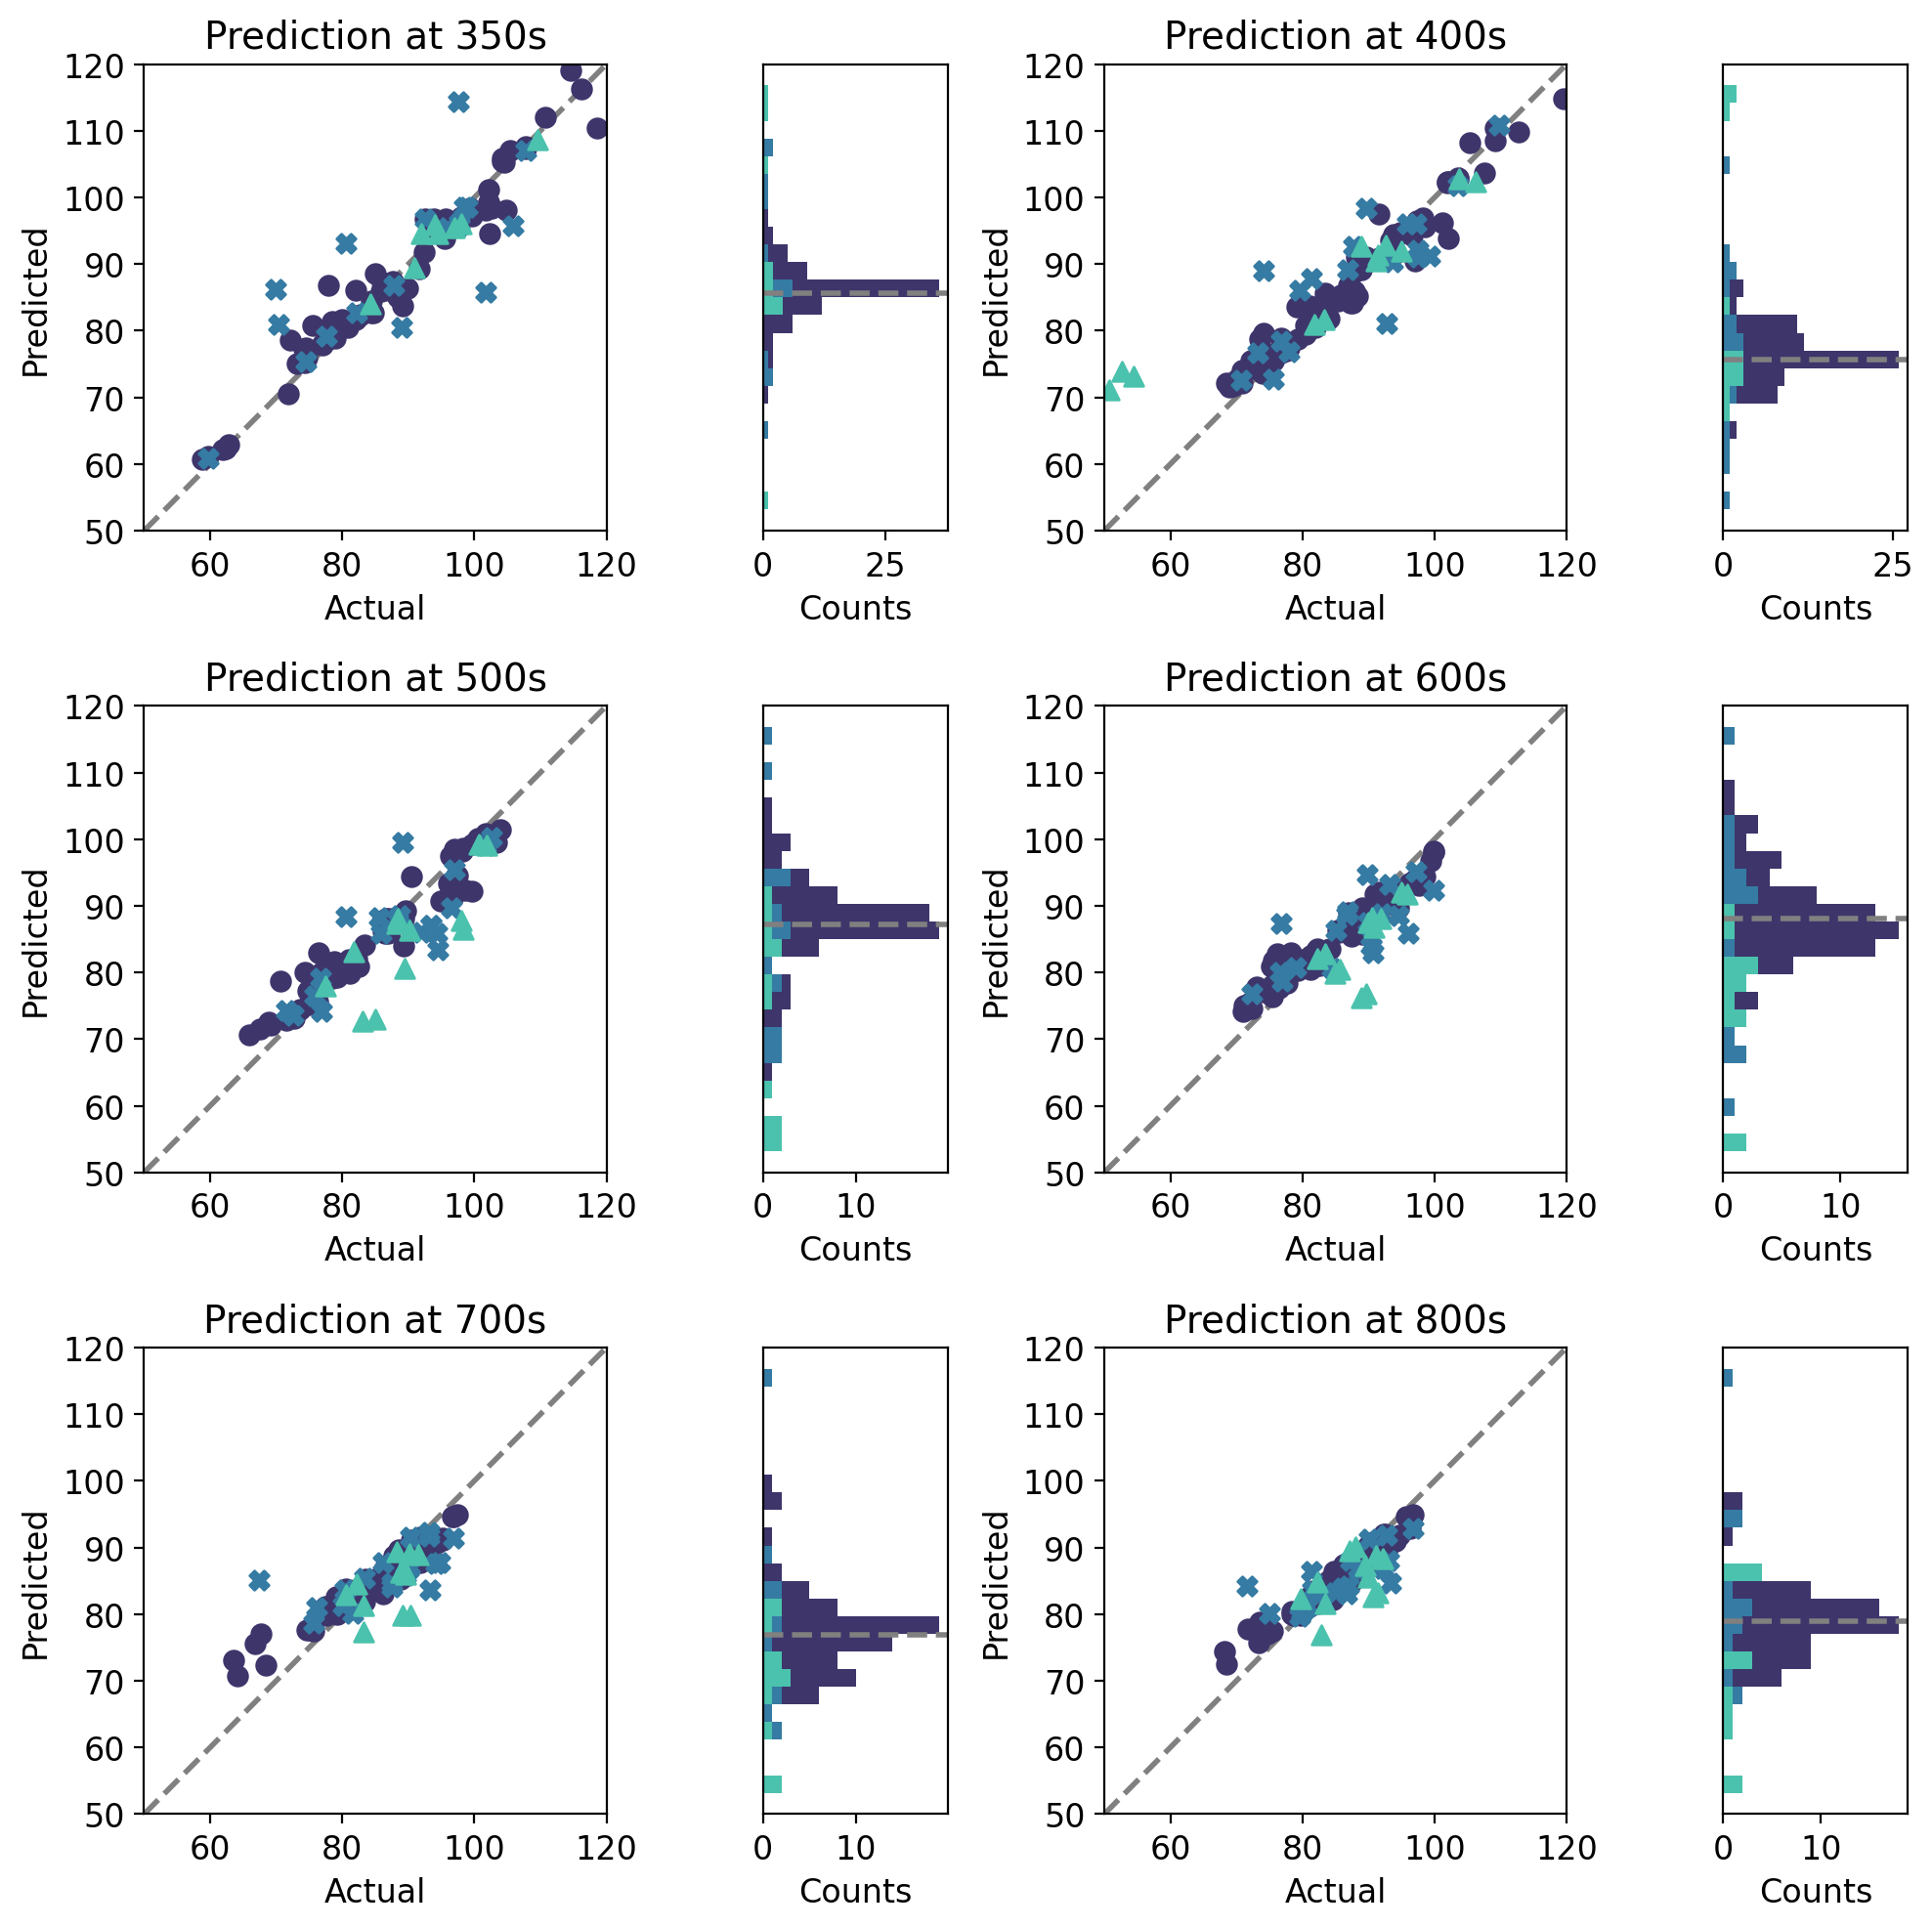

In [44]:
font_size = 12
sns.reset_orig()
plt.rcdefaults()
colors = sns.color_palette("mako", 3)
train_color, val_color, test_color = colors[0], colors[1], colors[2]
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 4, width_ratios=[5, 2] * 2, height_ratios=[1, 1, 1])

def plot_parity_and_hist(ax_parity, ax_hist, key):
    y_train = pred_train[key]
    y_val = pred_val[key]
    y_test = pred_test[key]
    actual_train_key = true_train[key]
    actual_val_key = true_val[key]
    actual_test_key = true_test[key]

    train_errors = y_train - actual_train_key
    val_errors = y_val - actual_val_key
    test_errors = y_test - actual_test_key

    all_errors = np.concatenate([train_errors, val_errors, test_errors])
    bins = np.linspace(np.min(all_errors), np.max(all_errors), 25)

    ax_parity.scatter(actual_train_key, y_train, color=train_color, s=50, label='Train', marker='o')
    ax_parity.scatter(actual_val_key, y_val, color=val_color, s=50, label='Validation', marker='X')
    ax_parity.scatter(actual_test_key, y_test, color=test_color, s=50, label='Test', marker='^')
    ax_parity.plot([50, 120], [50, 120], '--', lw=2, color="grey", zorder=0)
    ax_parity.set_xlim(50, 120)
    ax_parity.set_ylim(50, 120)
    ax_parity.set_xlabel('Actual', fontsize=font_size)
    ax_parity.set_ylabel('Predicted', fontsize=font_size)
    ax_parity.set_title(f'Prediction at {key}s', fontsize=font_size+2)
    ax_parity.tick_params(axis='both', which='major', labelsize=font_size)

    ax_hist.hist(train_errors, bins=bins, color=train_color, orientation='horizontal', ec = "grey")
    ax_hist.hist(val_errors, bins=bins, color=val_color, orientation='horizontal', ec = "grey")
    ax_hist.hist(test_errors, bins=bins, color=test_color, orientation='horizontal', ec = "grey")
    ax_hist.axhline(0, color='grey', linestyle='--', linewidth=2)
    ax_hist.set_xlabel('Counts', fontsize=font_size)
    ax_hist.yaxis.set_ticks([])
    ax_hist.tick_params(axis='x', which='major', labelsize=font_size)

for i, key in enumerate(keys):
    row, col = divmod(i, 2)
    ax_parity = plt.subplot(gs[row, col * 2])    
    ax_hist = plt.subplot(gs[row, col * 2 + 1]) 
    plot_parity_and_hist(ax_parity, ax_hist, key)

plt.tight_layout()
plt.show()

### Early predictions

In [45]:
sample_1 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 0],
        predicted_test['key_400'].iloc[:, 0],
        predicted_test['key_500'].iloc[:, 0],
        predicted_test['key_600'].iloc[:, 0],
        predicted_test['key_700'].iloc[:, 0],
        predicted_test['key_800'].iloc[:, 0],
    ],
    axis=1
)

sample_2 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 1],
        predicted_test['key_400'].iloc[:, 1],
        predicted_test['key_500'].iloc[:, 1],
        predicted_test['key_600'].iloc[:, 1],
        predicted_test['key_700'].iloc[:, 1],
        predicted_test['key_800'].iloc[:, 1],
    ],
    axis=1
)

sample_3 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 2],
        predicted_test['key_400'].iloc[:, 2],
        predicted_test['key_500'].iloc[:, 2],
        predicted_test['key_600'].iloc[:, 2],
        predicted_test['key_700'].iloc[:, 2],
        predicted_test['key_800'].iloc[:, 2],
    ],
    axis=1
)

sample_4 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 3],
        predicted_test['key_400'].iloc[:, 3],
        predicted_test['key_500'].iloc[:, 3],
        predicted_test['key_600'].iloc[:, 3],
        predicted_test['key_700'].iloc[:, 3],
        predicted_test['key_800'].iloc[:, 3],
    ],
    axis=1
)

sample_5 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 4],
        predicted_test['key_400'].iloc[:, 4],
        predicted_test['key_500'].iloc[:, 4],
        predicted_test['key_600'].iloc[:, 4],
        predicted_test['key_700'].iloc[:, 4],
        predicted_test['key_800'].iloc[:, 4],
    ],
    axis=1
)

sample_6 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 5],
        predicted_test['key_400'].iloc[:, 5],
        predicted_test['key_500'].iloc[:, 5],
        predicted_test['key_600'].iloc[:, 5],
        predicted_test['key_700'].iloc[:, 5],
        predicted_test['key_800'].iloc[:, 5],
    ],
    axis=1
)

sample_7 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 6],
        predicted_test['key_400'].iloc[:, 6],
        predicted_test['key_500'].iloc[:, 6],
        predicted_test['key_600'].iloc[:, 6],
        predicted_test['key_700'].iloc[:, 6],
        predicted_test['key_800'].iloc[:, 6],
    ],
    axis=1
)

sample_8 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 7],
        predicted_test['key_400'].iloc[:, 7],
        predicted_test['key_500'].iloc[:, 7],
        predicted_test['key_600'].iloc[:, 7],
        predicted_test['key_700'].iloc[:, 7],
        predicted_test['key_800'].iloc[:, 7],
    ],
    axis=1
)

sample_9 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 8],
        predicted_test['key_400'].iloc[:, 8],
        predicted_test['key_500'].iloc[:, 8],
        predicted_test['key_600'].iloc[:, 8],
        predicted_test['key_700'].iloc[:, 8],
        predicted_test['key_800'].iloc[:, 8],
    ],
    axis=1
)

sample_10 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 9],
        predicted_test['key_400'].iloc[:, 9],
        predicted_test['key_500'].iloc[:, 9],
        predicted_test['key_600'].iloc[:, 9],
        predicted_test['key_700'].iloc[:, 9],
        predicted_test['key_800'].iloc[:, 9],
    ],
    axis=1
)

sample_11 = pd.concat(
    [
        predicted_test['key_350'].iloc[:, 10],
        predicted_test['key_400'].iloc[:, 10],
        predicted_test['key_500'].iloc[:, 10],
        predicted_test['key_600'].iloc[:, 10],
        predicted_test['key_700'].iloc[:, 10],
        predicted_test['key_800'].iloc[:, 10],
    ],
    axis=1
)

sample_12 = pd.concat   ( [
        predicted_test['key_350'].iloc[:, 11],
        predicted_test['key_400'].iloc[:, 11],
        predicted_test['key_500'].iloc[:, 11],
        predicted_test['key_600'].iloc[:, 11],
        predicted_test['key_700'].iloc[:, 11],
        predicted_test['key_800'].iloc[:, 11],
    ],
    axis=1)

column_names = [
    'Charge saving score 350',
    'Charge saving score 400',
    'Charge saving score 500',
    'Charge saving score 600',
    'Charge saving score 700',
    'Charge saving score 800'
]

# Apply column names to each sample DataFrame
for sample in [sample_1, sample_2, sample_3, sample_4, sample_5, sample_6, sample_7, sample_8, sample_9, sample_10, sample_11, sample_12]:
    sample.columns = column_names

In [46]:
def calculate_confidence_interval(column, confidence=0.95):
    mean = column.mean()
    sem = stats.sem(column)
    margin = sem * stats.t.ppf((1 + confidence) / 2, len(column) - 1)
    return mean - margin, mean + margin

confidence_intervals_sample_1 = {col: calculate_confidence_interval(sample_1[col]) for col in sample_1.columns}
confidence_intervals_sample_2 = {col: calculate_confidence_interval(sample_2[col]) for col in sample_2.columns}
confidence_intervals_sample_3 = {col: calculate_confidence_interval(sample_3[col]) for col in sample_3.columns}
confidence_intervals_sample_4 = {col: calculate_confidence_interval(sample_4[col]) for col in sample_4.columns}
confidence_intervals_sample_5 = {col: calculate_confidence_interval(sample_5[col]) for col in sample_5.columns}
confidence_intervals_sample_6 = {col: calculate_confidence_interval(sample_6[col]) for col in sample_6.columns}
confidence_intervals_sample_7 = {col: calculate_confidence_interval(sample_7[col]) for col in sample_7.columns}
confidence_intervals_sample_8 = {col: calculate_confidence_interval(sample_8[col]) for col in sample_8.columns}
confidence_intervals_sample_9 = {col: calculate_confidence_interval(sample_9[col]) for col in sample_9.columns}
confidence_intervals_sample_10 = {col: calculate_confidence_interval(sample_10[col]) for col in sample_10.columns}
confidence_intervals_sample_11 = {col: calculate_confidence_interval(sample_11[col]) for col in sample_11.columns}
confidence_intervals_sample_12 = {col: calculate_confidence_interval(sample_12[col]) for col in sample_12.columns}

def plot_confidence_intervals(data, dataset_name):
    # Calculate confidence intervals
    confidence_intervals = {col: calculate_confidence_interval(data[col]) for col in data.columns}
    
    # Extract mean and confidence bounds
    means = [(ci[0] + ci[1]) / 2 for ci in confidence_intervals.values()]
    lower_bounds = [ci[0] for ci in confidence_intervals.values()]
    upper_bounds = [ci[1] for ci in confidence_intervals.values()]
    time_frames = [col.split()[-1] for col in data.columns]

    return means, lower_bounds, upper_bounds, time_frames

means_1, lb_1, ub_1, tf_1 = plot_confidence_intervals(sample_1, "Trip 1")
means_2, lb_2, ub_2, tf_2 = plot_confidence_intervals(sample_2, "Trip 2")
means_3, lb_3, ub_3, tf_3 = plot_confidence_intervals(sample_3, "Trip 3")
means_4, lb_4, ub_4, tf_4 = plot_confidence_intervals(sample_4, "Trip 4")
means_5, lb_5, ub_5, tf_5 = plot_confidence_intervals(sample_5, "Trip 5")
means_6, lb_6, ub_6, tf_6 = plot_confidence_intervals(sample_6, "Trip 6")
means_7, lb_7, ub_7, tf_7 = plot_confidence_intervals(sample_7, "Trip 7")
means_8, lb_8, ub_8, tf_8 = plot_confidence_intervals(sample_8, "Trip 8")
means_9, lb_9, ub_9, tf_9 = plot_confidence_intervals(sample_9, "Trip 9")
means_10, lb_10, ub_10, tf_10 = plot_confidence_intervals(sample_10, "Trip 10")
means_11, lb_11, ub_11, tf_11 = plot_confidence_intervals(sample_11, "Trip 11")
means_12, lb_12, ub_12, tf_12 = plot_confidence_intervals(sample_12, "Trip 12")

In [47]:
# Slice all means, lb, ub, and tf arrays
means_1 = means_1[2:6]
lb_1 = lb_1[2:6]
ub_1 = ub_1[2:6]
tf_1 = tf_1[2:6]

means_2 = means_2[2:6]
lb_2 = lb_2[2:6]
ub_2 = ub_2[2:6]
tf_2 = tf_2[2:6]

means_3 = means_3[2:6]
lb_3 = lb_3[2:6]
ub_3 = ub_3[2:6]
tf_3 = tf_3[2:6]

means_4 = means_4[2:6]
lb_4 = lb_4[2:6]
ub_4 = ub_4[2:6]
tf_4 = tf_4[2:6]

means_5 = means_5[2:6]
lb_5 = lb_5[2:6]
ub_5 = ub_5[2:6]
tf_5 = tf_5[2:6]

means_6 = means_6[2:6]
lb_6 = lb_6[2:6]
ub_6 = ub_6[2:6]
tf_6 = tf_6[2:6]

means_7 = means_7[2:6]
lb_7 = lb_7[2:6]
ub_7 = ub_7[2:6]
tf_7 = tf_7[2:6]

means_8 = means_8[2:6]
lb_8 = lb_8[2:6]
ub_8 = ub_8[2:6]
tf_8 = tf_8[2:6]

means_9 = means_9[2:6]
lb_9 = lb_9[2:6]
ub_9 = ub_9[2:6]
tf_9 = tf_9[2:6]

means_10 = means_10[2:6]
lb_10 = lb_10[2:6]
ub_10 = ub_10[2:6]
tf_10 = tf_10[2:6]

means_11 = means_11[2:6]
lb_11 = lb_11[2:6]
ub_11 = ub_11[2:6]
tf_11 = tf_11[2:6]

means_12 = means_12[2:6]
lb_12 = lb_12[2:6]
ub_12 = ub_12[2:6]
tf_12 = tf_12[2:6]

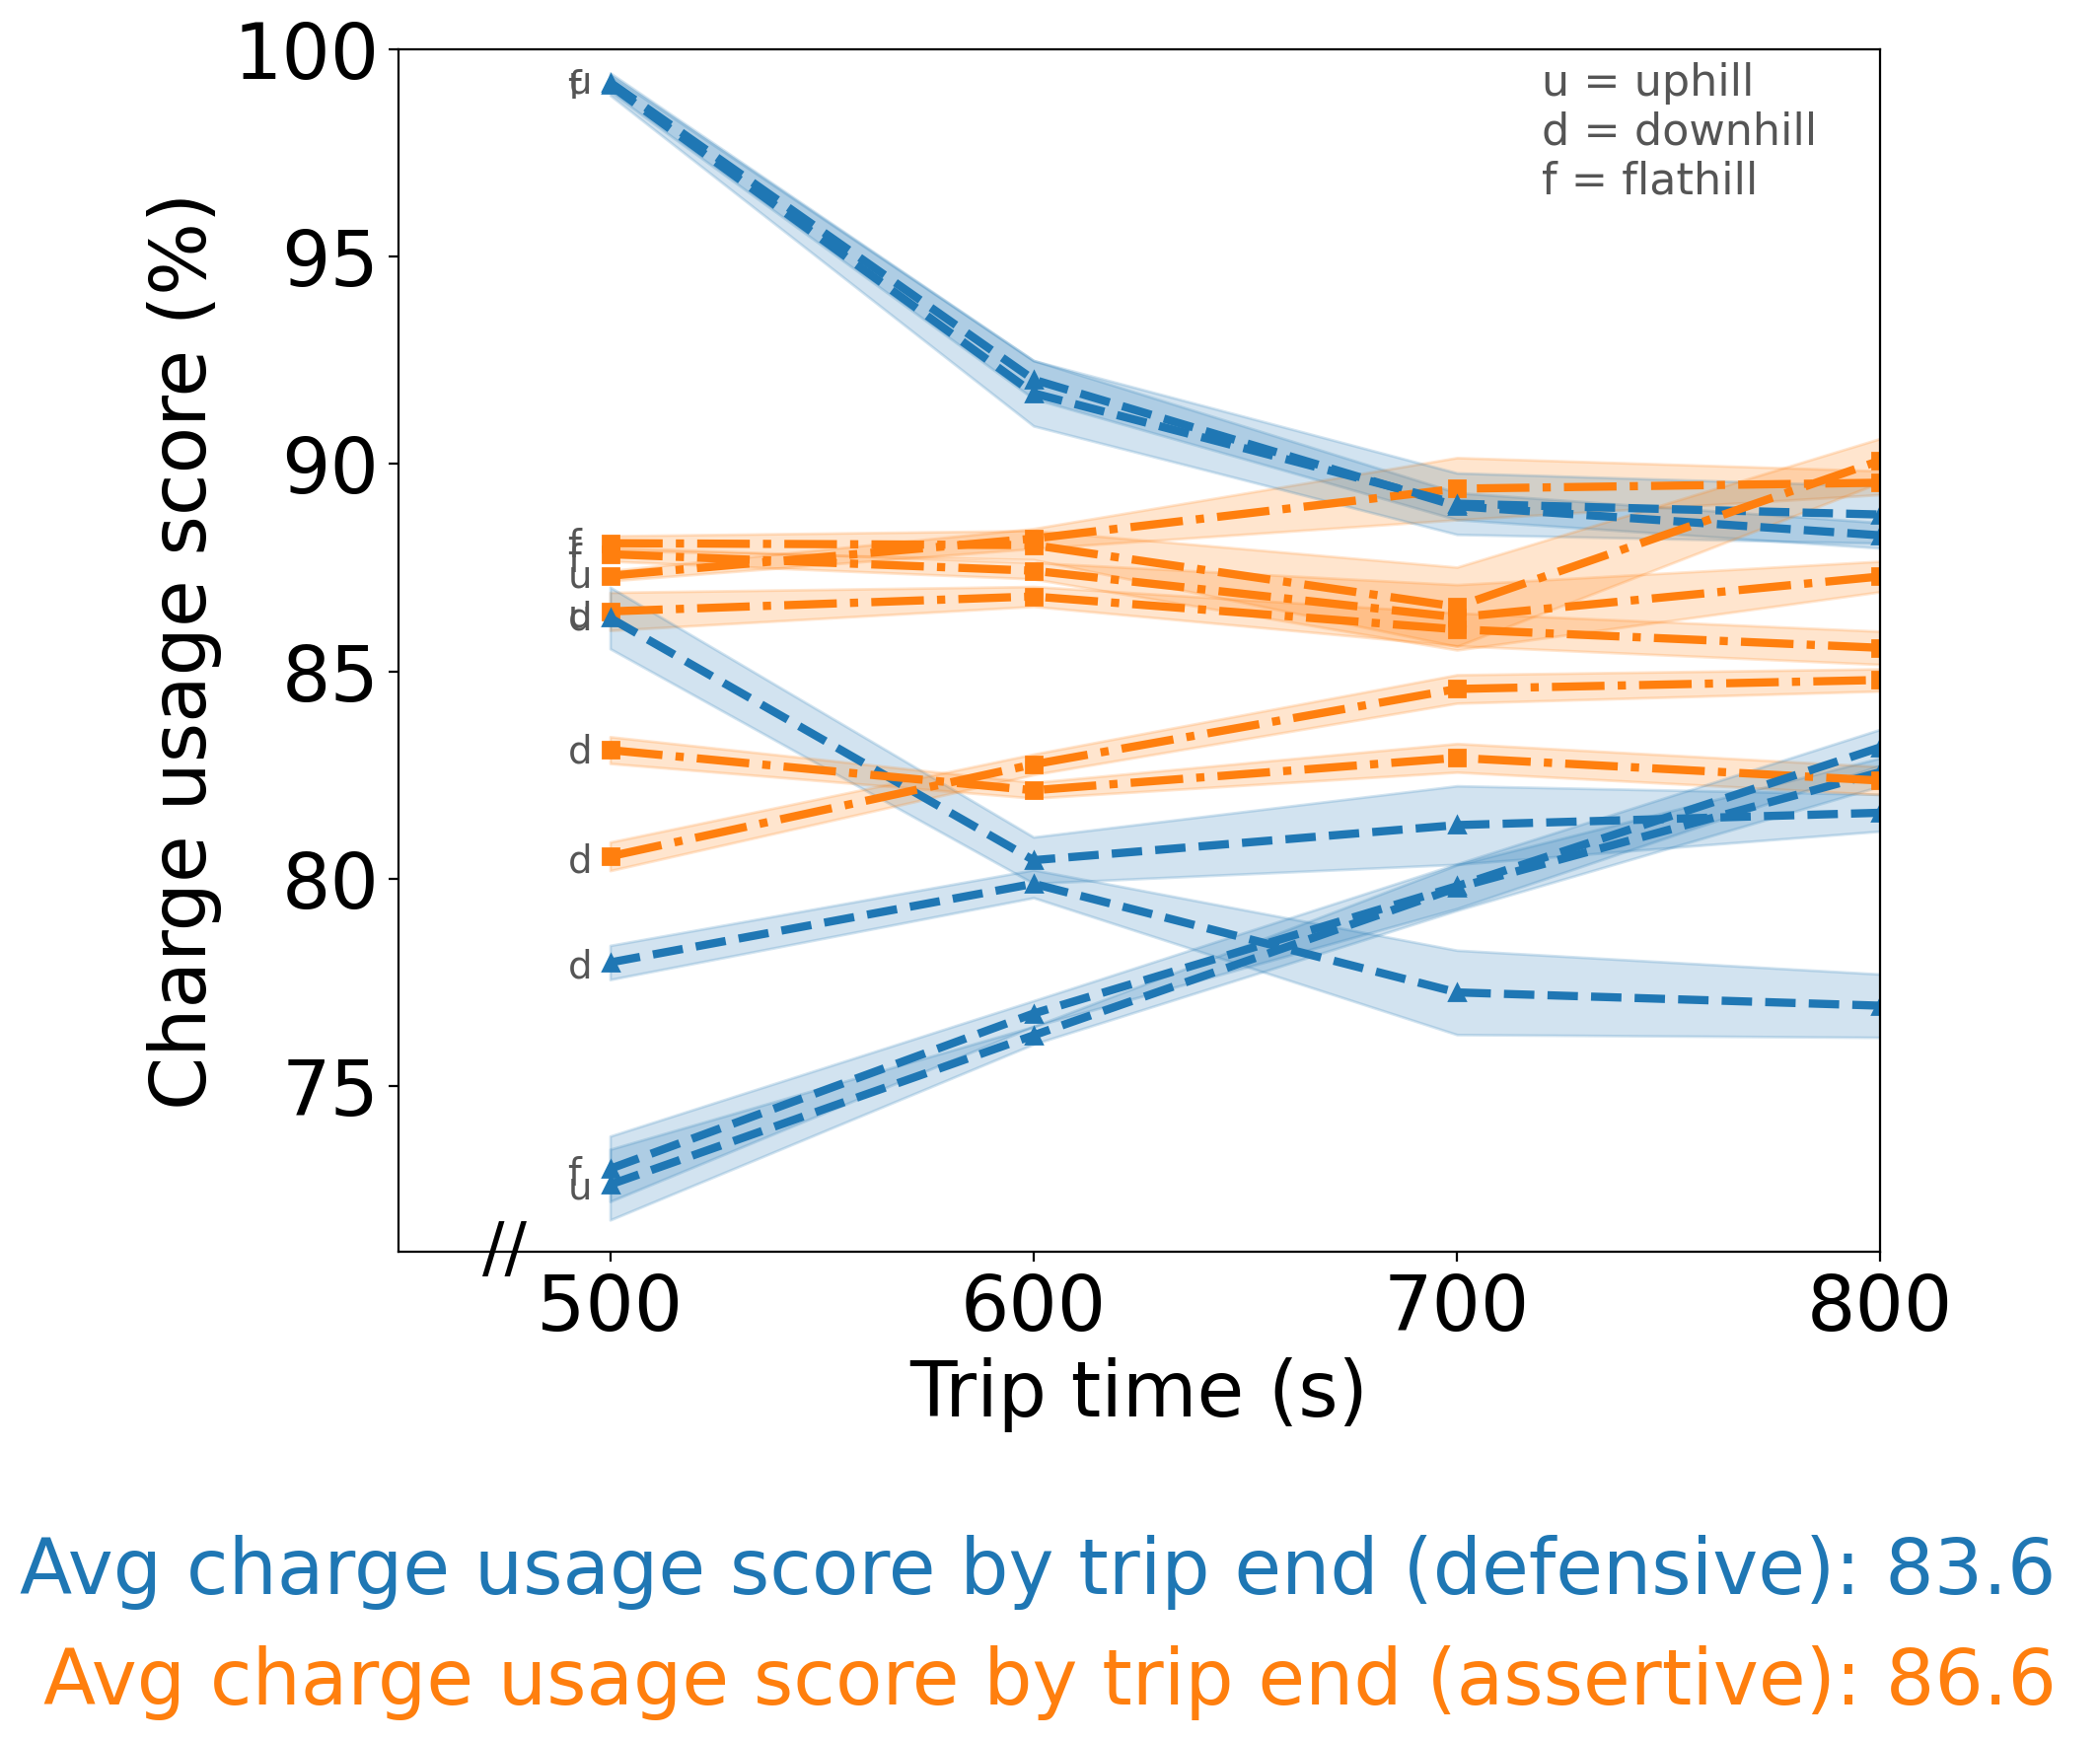

In [ ]:
sns.reset_orig()
plt.rcdefaults()
plt.rcdefaults() 
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 28
time_frames = [500, 600, 700, 800]

plt.plot(time_frames, means_1, marker='^', label='Trip 1 (uphill)', color='C0', linestyle="--", lw = 3)
plt.fill_between(time_frames, lb_1, ub_1, color='C0', alpha=0.2)
plt.plot(time_frames, means_2, marker='s', label='Trip 2 (uphill)', color='C1', linestyle="-.", lw = 3)
plt.fill_between(time_frames, lb_2, ub_2, color='C1', alpha=0.2)
plt.plot(time_frames, means_7, marker='^', label='Trip 7 (uphill)', color='C0', linestyle="--", lw = 3)
plt.fill_between(time_frames, lb_7, ub_7, color='C0', alpha=0.2)
plt.plot(time_frames, means_8, marker='s', label='Trip 8 (uphill)', color='C1', linestyle="-.", lw = 3)
plt.fill_between(time_frames, lb_8, ub_8, color='C1', alpha=0.2)

plt.plot(time_frames, means_3, marker='^', label='Trip 3 (downhill)', color='C0', linestyle="--", lw = 3)
plt.fill_between(time_frames, lb_3, ub_3, color='C0', alpha=0.2)
plt.plot(time_frames, means_4, marker='s', label='Trip 4 (downhill)', color='C1', linestyle="-.", lw = 3)
plt.fill_between(time_frames, lb_4, ub_4, color='C1', alpha=0.2)
plt.plot(time_frames, means_9, marker='^', label='Trip 9 (downhill)', color='C0', linestyle="--", lw = 3)
plt.fill_between(time_frames, lb_9, ub_9, color='C0', alpha=0.2)
plt.plot(time_frames, means_10, marker='s', label='Trip 10 (downhill)', color='C1', linestyle="-.", lw = 3)
plt.fill_between(time_frames, lb_10, ub_10, color='C1', alpha=0.2)

plt.plot(time_frames, means_5, marker='^', label='Trip 5 (flathill)', color='C0', linestyle="--", lw = 3)
plt.fill_between(time_frames, lb_5, ub_5, color='C0', alpha=0.2)
plt.plot(time_frames, means_6, marker='s', label='Trip 6 (flathill)', color='C1', linestyle="-.", lw = 3)
plt.fill_between(time_frames, lb_6, ub_6, color='C1', alpha=0.2)
plt.plot(time_frames, means_11, marker='^', label='Trip 11 (flathill)', color='C0', linestyle="--", lw = 3)
plt.fill_between(time_frames, lb_11, ub_11, color='C0', alpha=0.2)
plt.plot(time_frames, means_12, marker='s', label='Trip 12 (flathill)', color='C1', linestyle="-.", lw = 3)
plt.fill_between(time_frames, lb_12, ub_12, color='C1', alpha=0.2)

plt.axvspan(200, 300, color='grey', alpha=0.3)
plt.axvspan(300, 350, color='lightgreen', alpha=0.3)
plt.axvline(300, color='black', linestyle='--', linewidth=0.5)
plt.axvline(350, color='black', linestyle='--', linewidth=0.5)
# plt.grid(color="grey", alpha=0.2, linestyle="--")
# plt.gca().set_axisbelow(True)
plt.text(475, 71, "//", fontsize=24, va='center', ha='center', color='black')

# Define terrain labels for each trip
terrain_labels = ['u', 'u', 'd', 'd', 'f', 'f', 'u', 'u', 'd', 'd', 'f', 'f']

# Annotate at the start of each line (500 sec)
for i, (trip, label) in enumerate(zip(
    [means_1, means_2, means_3, means_4, means_5, means_6, 
     means_7, means_8, means_9, means_10, means_11, means_12],
    terrain_labels)):

    plt.text(490, trip[0] - (i) * 0.015 ,  # Slight vertical offset to avoid overlap
             label, 
             color='#555555', 
             fontsize=14, 
             va='center')

defensive_trips = [means_1[-1], means_3[-1], means_5[-1], means_7[-1], means_9[-1], means_11[-1]]
assertive_trips = [means_2[-1], means_4[-1], means_6[-1], means_8[-1], means_10[-1], means_12[-1]]

# Calculate average scores
avg_defensive = np.mean(defensive_trips)
avg_assertive = np.mean(assertive_trips)

# Add the average annotations at the bottom of the plot
plt.figtext(0.5, - 0.05,  # Adjust y for positioning below the plot
            f'Avg charge usage score by trip end (defensive): {avg_defensive:.1f} ', 
            ha='center', fontsize=28, color='C0')

plt.figtext(0.5, -.12,  
            f'Avg charge usage score by trip end (assertive): {avg_assertive:.1f}', 
            ha='center', fontsize=28, color='C1')

# Create custom legend handles
legend_elements = [
    Line2D([0], [0], color='C0', lw=2, linestyle='--', label='Defensive'),
    Line2D([0], [0], color='C1', lw=2, linestyle='-.', label='Assertive')]

# Add custom legend to plot
# plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.18, 1))
# Add terrain legend as text box
# Add terrain legend as text box
plt.text(720, 98,
         'u = uphill\n'
         'd = downhill\n'
         'f = flathill', 
         ha='left', va='center', fontsize=16,
         color='#555555',
         bbox={'facecolor': 'white', 'alpha': 0, 'edgecolor': 'lightgrey'})  # Correct bbox format


plt.xlabel('Trip time (s)')
plt.ylabel('Charge usage score (%)')
plt.ylim(71, 100)
plt.xlim(450, 800)
plt.tight_layout()
# fig.savefig(PLOT_DIR / 'early_feedback.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()